This work is done in the context of Machine Learning Course at TBS.

In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import keras_tuner as kt





First Look:

In [2]:
df = pd.read_csv(r'C:\Users\Dorra\Pictures\ML\mushroom_cleaned.csv')
df.head()

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1

Nb of entries in our dataset:

In [3]:
df.shape

(54035, 9)

Columns and types:

In [4]:
df.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

The dataset provided is already cleaned, but we will check nonetheless:

In [5]:
df.isnull().sum()


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Descriptive Statistics:

In [6]:
df.describe().iloc[1:]


cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
mean    567.257204   4.000315         2.142056    7.329509     0.759110   
std     359.883763   2.160505         2.228821    3.200266     0.650969   
min       0.000000   0.000000         0.000000    0.000000     0.000426   
25%     289.000000   2.000000         0.000000    5.000000     0.270997   
50%     525.000000   5.000000         1.000000    8.000000     0.593295   
75%     781.000000   6.000000         4.000000   10.000000     1.054858   
max    1891.000000   6.000000         6.000000   11.000000     3.835320   

       stem-width  stem-color    season     class  
mean  1051.081299    8.418062  0.952163  0.549181  
std    782.056076    3.262078  0.305594  0.497580  
min      0.000000    0.000000  0.027372  0.000000  
25%    421.000000    6.000000  0.888450  0.000000  
50%    923.000000   11.000000  0.943195  1.000000  
75%   1523.000000   11.000000  0.943195  1.000000  
max   3569.000000   12.000000  1.804273  1.000000

Correlation between Class and the rest of the columns:

In [7]:
df_corr = df.corr()['class'][:-1] # -1 to remove the last row which is class
df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Observations from Data Exploration:
- Dataset has 54035 rows and 9 columns.
- Data type of all columns is numerical (float or integer).
- All values are non-null. Therefore no missing values.
- Correlation between class and feature columns in df is low, absolute value ranging between 5% and 18.3%.

The dataset has already undergone z-score normalization, so we will skip that step.

Outliers:

In [8]:
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df), columns=df.columns)

# Generate descriptive statistics for the z-scores
z_scores.describe().round(3)

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
count     54035.000  54035.000        54035.000   54035.000    54035.000   
mean          0.000      0.000            0.000      -0.000        0.000   
std           1.000      1.000            1.000       1.000        1.000   
min          -1.576     -1.852           -0.961      -2.290       -1.165   
25%          -0.773     -0.926           -0.961      -0.728       -0.750   
50%          -0.117      0.463           -0.512       0.210       -0.255   
75%           0.594      0.926            0.834       0.834        0.454   
max           3.678      0.926            1.731       1.147        4.726   

       stem-width  stem-color     season      class  
count   54035.000   54035.000  54035.000  54035.000  
mean       -0.000       0.000     -0.000     -0.000  
std         1.000       1.000      1.000      1.000  
min        -1.344      -2.581     -3.026     -1.104  
25%        -0.806      -0.741     -0.208     -1.104  
50%        -0.164       0.792     -0.029      0.906  
75%         0.603       0.792     -0.029      0.906  
max         3.220       1.098      2.788      0.906

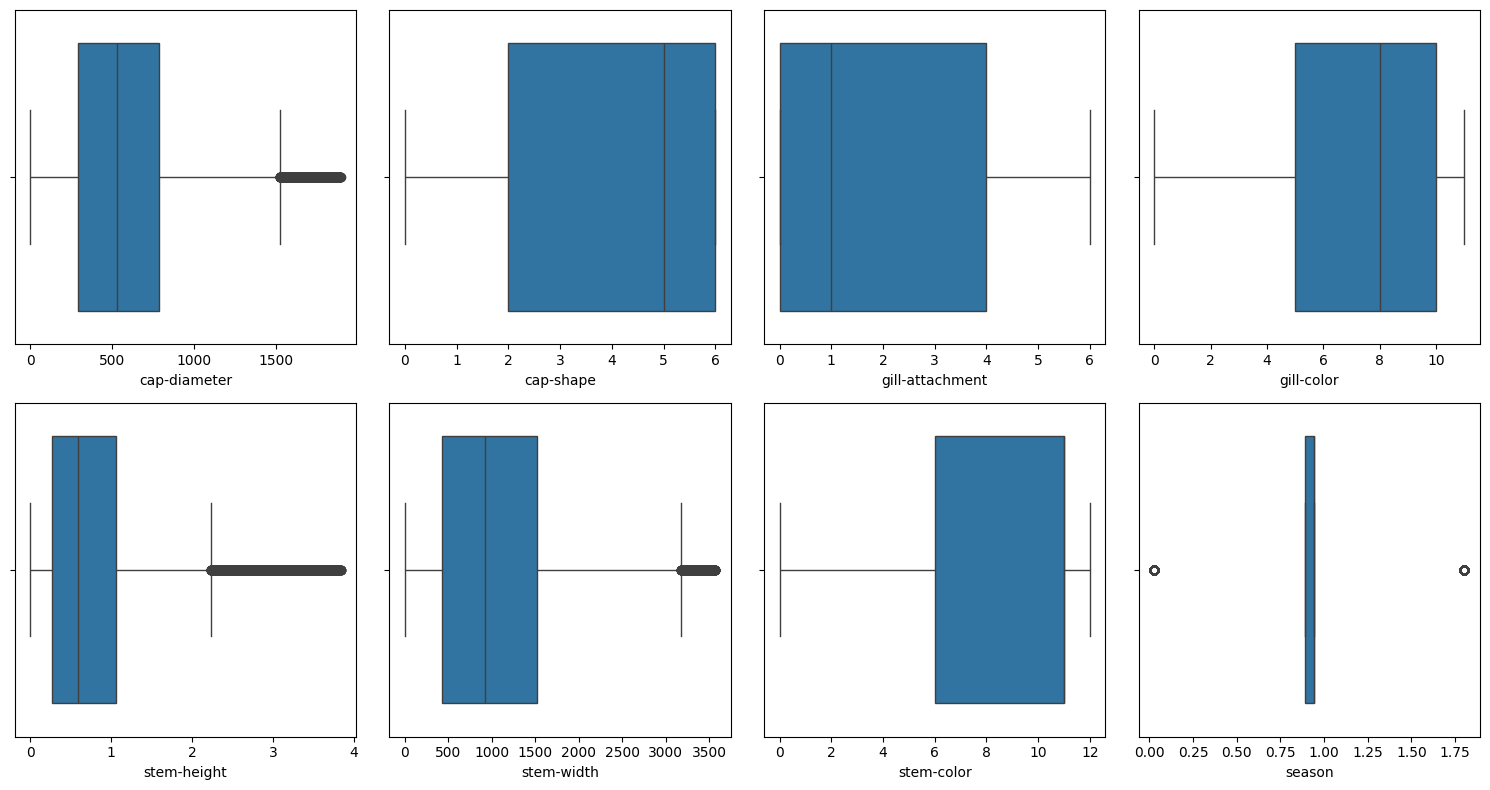

In [9]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

In [10]:
# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the identified rows containing outliers
df_no_outliers = df.drop(outliers.index)

Let's drop rows containing outliers (with Z-score > 3).

In [11]:
# Calculate number of rows of original dataframe, of new one and how many rows were removed
new_num_r = df_no_outliers.shape[0]
old_num_r = df.shape[0]
removed = old_num_r - new_num_r

print("New dataframe has {} rows. {} rows were removed.".format(new_num_r, removed))

New dataframe has 50397 rows. 3638 rows were removed.


Overall Class Imbalance:

Overall Class Distribution:
       proportion
class            
1       54.918109
0       45.081891


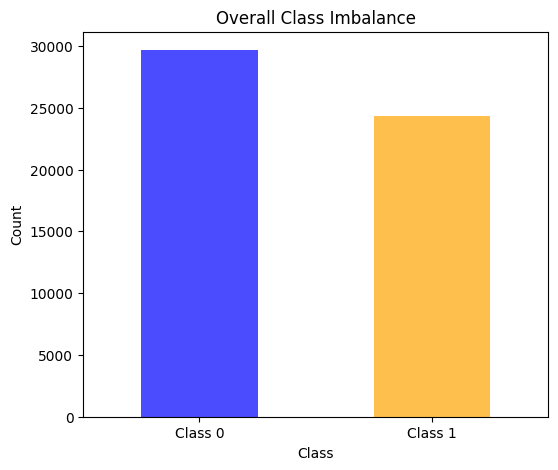

In [12]:
# Calculate overall class distribution
class_counts = df['class'].value_counts(normalize=True) * 100

# Display the class distribution
print("Overall Class Distribution:")
print(class_counts.to_frame())

# Visualizing Overall Class Imbalance with Blue and Orange Colors
plt.figure(figsize=(6, 5))
df['class'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Overall Class Imbalance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


Classes are overall reasonably balanced.

Features Class Imbalance:

In [13]:


# Define feature columns (excluding the target column 'class')
feature_columns = df.columns[df.columns != 'class']

# Re-run statistical tests for feature-class imbalance

# Dictionary to store test results
feature_class_imbalance_results = {}

# Iterate through each feature and perform statistical tests
for feature in feature_columns:
    # If the feature is numerical, use KS-Test
    if df[feature].dtype in ['int64', 'float64']:
        stat, p_value = ks_2samp(df[df['class'] == 1][feature], df[df['class'] == 0][feature])
        feature_class_imbalance_results[feature] = {'Test': 'KS-Test', 'Statistic': stat, 'P-Value': p_value}
    
    # If the feature is categorical, use Chi-Square Test
    else:
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        feature_class_imbalance_results[feature] = {'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_value}

# Convert results to DataFrame for easier interpretation
feature_class_imbalance_df = pd.DataFrame.from_dict(feature_class_imbalance_results, orient='index')

# Display the statistical results
display(feature_class_imbalance_df)



# Function to calculate Cohen's d (effect size)
def cohen_d(x1, x2):
    """Calculate Cohen's d for two independent samples."""
    mean_diff = np.mean(x1) - np.mean(x2)
    pooled_std = np.sqrt((np.std(x1, ddof=1) ** 2 + np.std(x2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Dictionary to store effect size results
effect_size_results = {}

# Calculate Cohen's d for each numerical feature
for feature in feature_class_imbalance_df.index:
    class_1_values = df[df['class'] == 1][feature]
    class_0_values = df[df['class'] == 0][feature]
    
    # Compute Cohen's d
    effect_size = cohen_d(class_1_values, class_0_values)
    effect_size_results[feature] = {'Cohen\'s d': effect_size}

# Convert results to DataFrame
effect_size_df = pd.DataFrame.from_dict(effect_size_results, orient='index')

# Display effect size results
display(effect_size_df)



Test  Statistic        P-Value
cap-diameter     KS-Test   0.174199   0.000000e+00
cap-shape        KS-Test   0.125214  2.769306e-183
gill-attachment  KS-Test   0.098374  3.799099e-113
gill-color       KS-Test   0.106554  1.015611e-132
stem-height      KS-Test   0.184579   0.000000e+00
stem-width       KS-Test   0.240441   0.000000e+00
stem-color       KS-Test   0.165519  8.754843e-321
season           KS-Test   0.074226   1.521302e-64

Cohen's d
cap-diameter     -0.337909
cap-shape        -0.271657
gill-attachment  -0.105941
gill-color       -0.128616
stem-height       0.377580
stem-width       -0.375564
stem-color       -0.261044
season           -0.164263

All features have a Cohen’s d below 0.35 (maximum one being 0.34 with cap-diameter), meaning the differences aren’t very strong. Minimal imbalance, likely not a concern.

Even though statistical tests flagged all features as imbalanced, the effect size suggests the imbalance is weak, meaning negligible impact on the models.

Skewness:

In [14]:

# Calculate skewness for each numerical feature
skewness_results = df[feature_class_imbalance_df.index].skew()

# Convert to DataFrame for better visualization
skewness_df = skewness_results.to_frame(name="Skewness")

# Display skewness results
display(skewness_df)


Skewness
cap-diameter     0.782562
cap-shape       -0.534834
gill-attachment  0.589288
gill-color      -0.488642
stem-height      1.461606
stem-width       0.812370
stem-color      -0.632628
season           0.551232

Understanding Skewness:
Skewness ≈ 0 → Symmetrical distribution (ideal for many models).
Skewness > 0.5 → Right (Positive) Skew (long tail on the right).
Skewness < -0.5 → Left (Negative) Skew (long tail on the left).
Severely skewed features (>1 or <-1) may need log transformation, square root transformation, or normalization.

"Stem-height" (1.46) and "Cap-diameter" (0.78) are moderately to highly right-skewed. 
"Cap-shape" (-0.53) and "Gill-color" (-0.48) are slightly left-skewed, but not extreme. 
"Gill-attachment" (0.59) is mildly right-skewed.

Data Visualizations:

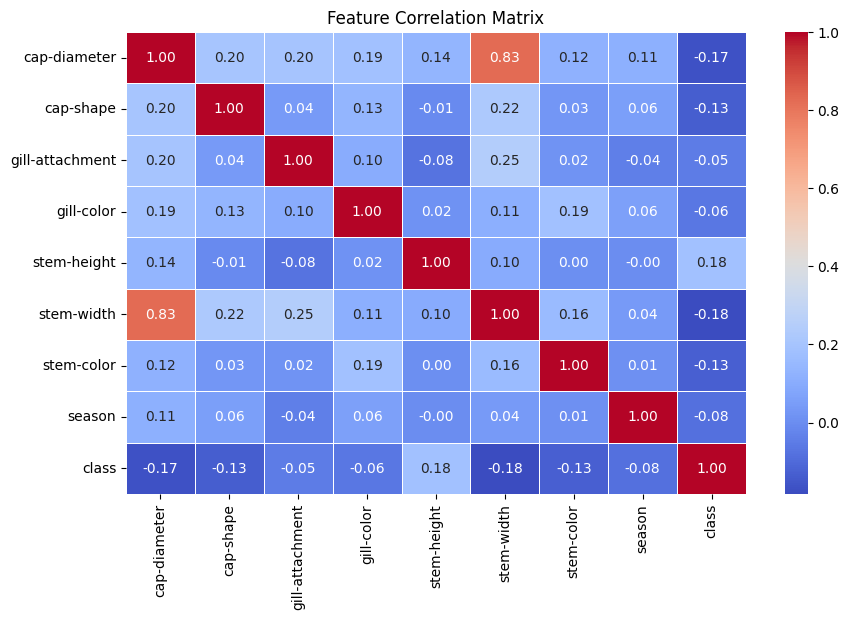

In [15]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Close to 1 → Strong positive correlation (both features increase together).
Close to -1 → Strong negative correlation (one increases while the other decreases).
Near 0 → Weak or no correlation.

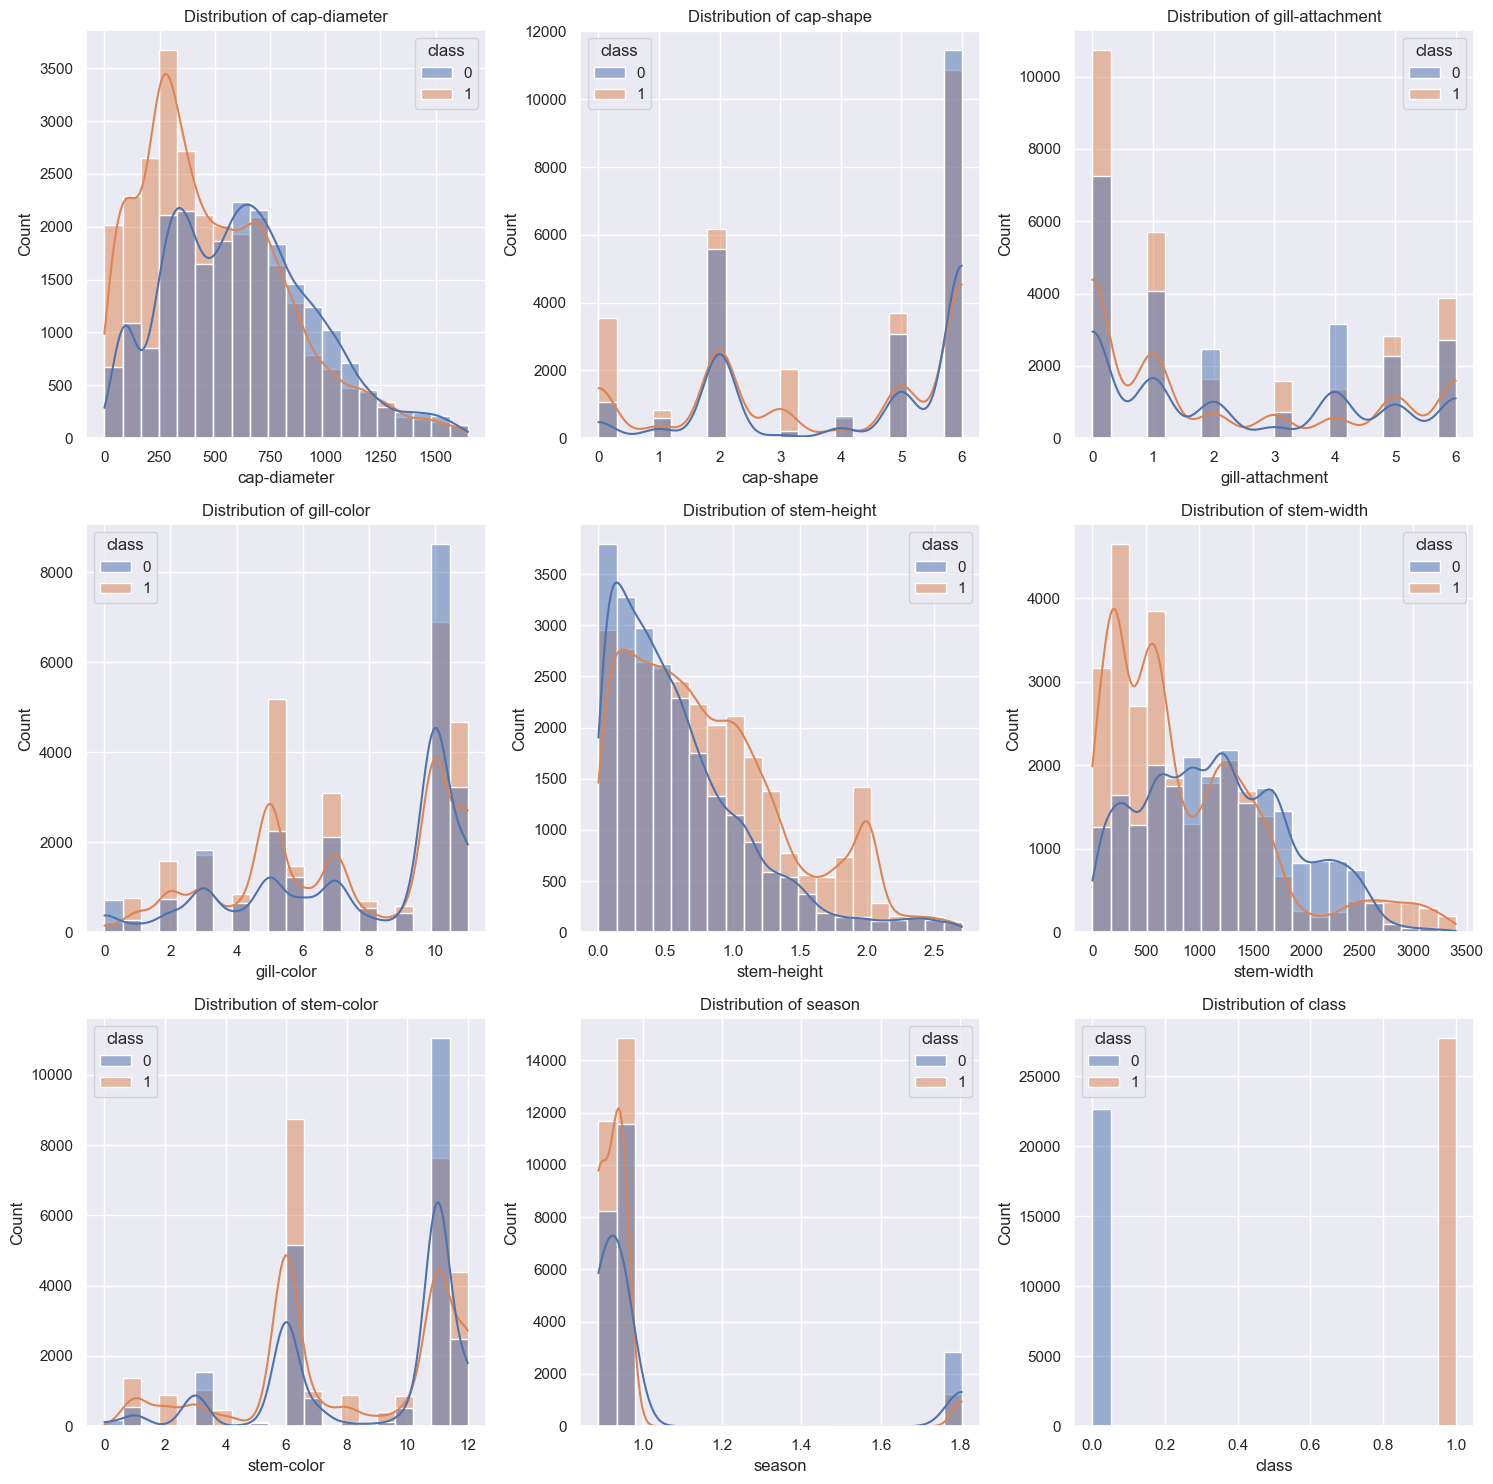

In [16]:
# Set Seaborn style
sns.set_theme()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df_no_outliers.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df_no_outliers, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()


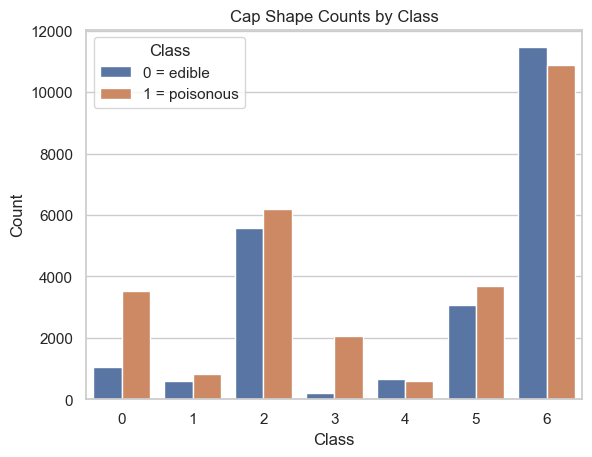

In [17]:
sns.set_theme(style="whitegrid")

# Create a count plot to visualize the distribution of 'cap-shape' with hue by 'class'
sns.countplot(hue='class', x='cap-shape', data=df_no_outliers)

# Adding title and labels
plt.title('Cap Shape Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

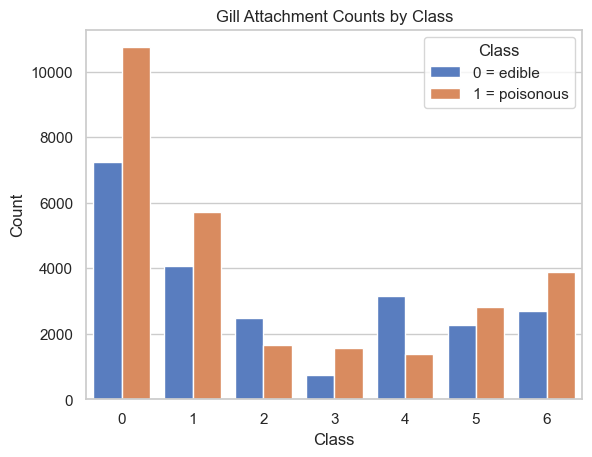

In [18]:
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Create a count plot to visualize the distribution of 'gill-attachment' with hue by 'class'
sns.countplot(hue='class', x='gill-attachment', data=df_no_outliers)

# Adding title and labels
plt.title('Gill Attachment Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Differences between classes are evident in the histograms and count plots. On average poisonous mushrooms have smaller cap diameters and taller, slimmer stems compared to edible ones.

Data Preprocessing:

Set a variable X equal to the numerical features and a variable y equal to the "class" column.

In [19]:
X = df_no_outliers.loc[:, df_no_outliers.columns != "class"]
y = df_no_outliers['class']

Data Scaling:

In [20]:

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Train / Test Split: We must ensure all models use the same test and train sets so that we guarantee a fair comparison later on.

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Defining a cross validation k fold:

In [22]:

from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


Traditional Models:

Logistic Regression:

In [23]:


logistic_model = LogisticRegression(max_iter=1000, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Logistic Regression  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       



In [24]:




# # Define the parameter grid for C (regularization strength)
# param_grid = {
#     "C": [0.001, 0.01, 0.1, 1, 10, 100],
#     "penalty": ["l1", "l2"],
#     "solver": ["liblinear", "saga"],
#     "max_iter": [500, 1000, 2000]
# }

# # Perform GridSearchCV with K-Fold CV
# grid_search = GridSearchCV(
#     logistic_model,
#     param_grid,
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492

In [25]:
# # Evaluate the updated model using K-Fold CV
# precision_list, recall_list, f1_list, support_list = [], [], [], []
# confusion_matrices = []

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     logistic_model.fit(X_train, y_train)
#     y_pred = logistic_model.predict(X_test)

#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test, y_pred, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)
    
#     # Compute and store confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     confusion_matrices.append(cm)

# # Compute average precision, recall, f1-score
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute final confusion matrix (sum of all folds)
# final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# # Generate report
# report = (
#     f"Logistic Regression - Final Evaluation (K={kf.get_n_splits()})\n\n"
#     f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
# )
# for i, label in enumerate(["0", "1"]):
#     report += (
#         f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
#     )
# report += (
#     f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
#     f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
#     f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
# )

# print(report)
# print("Final Confusion Matrix:")
# print(final_confusion_matrix)


Manually updated model:

In [63]:
from sklearn.metrics import confusion_matrix

logistic_model = LogisticRegression(C=1, max_iter=500, penalty='l2', solver='liblinear', random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
logistic_final_confusion_matrix = np.sum(confusion_matrices, axis=0)

report = (
    f"Logistic Regression Final  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

# Print final confusion matrix
print("Final Confusion Matrix:")
print(logistic_final_confusion_matrix)

Logistic Regression Final  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12481 10164]
 [ 7517 20235]]


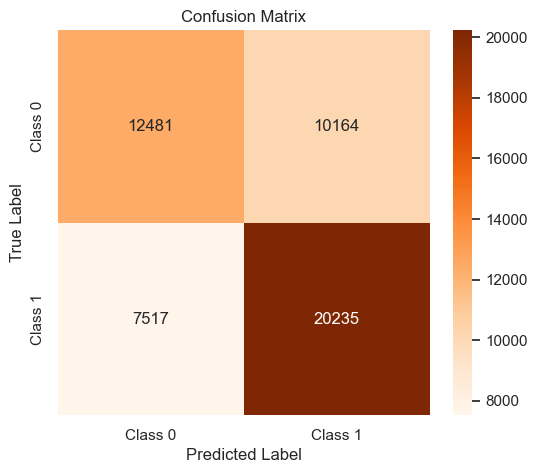

In [64]:

# Define labels
labels = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(logistic_final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


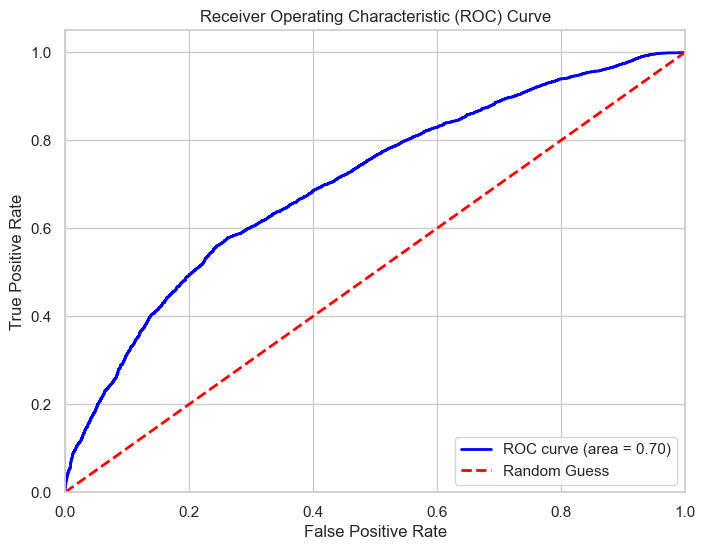

In [28]:
from sklearn.metrics import roc_curve, auc

logistic_predictions_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
logistic_fpr, logistic_tpr, logistic_thresholds = roc_curve(y_test, logistic_predictions_proba)
logistic_roc_auc = auc(logistic_fpr, logistic_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN:

In [29]:

knn_model = KNeighborsClassifier(n_neighbors=3)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"K-Nearest Neighbors  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


K-Nearest Neighbors  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.69        4529        
1           0.75        0.74        0.74        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.72        0.72        0.72        10079       



In [30]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     "n_neighbors": range(1, 21, 2),  # More values for finer tuning
#     "weights": ["uniform", "distance"],
#     "metric": ["euclidean", "manhattan", "minkowski"],
#     "p": [1, 2, 3],  # Optimize distance metric
#     "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
# }

# # Perform RandomizedSearchCV for faster hyperparameter tuning
# random_search = RandomizedSearchCV(
#     knn_model,
#     param_grid,
#     n_iter=20,  # Randomly sample 20 combinations
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492

In [31]:

# from sklearn.model_selection import GridSearchCV


# # Ensure best_params is from the KNeighborsClassifier grid search
# best_knn_params = grid_search.best_params_

# # Update KNN model with the best parameters
# knn_model = KNeighborsClassifier(
#     n_neighbors=best_knn_params['n_neighbors'],
#     weights=best_knn_params['weights'],
#     metric=best_knn_params['metric'],
#     p=best_knn_params['p'],
#     algorithm=best_knn_params['algorithm']
# )

# # Evaluate the updated model using K-Fold CV
# precision_list, recall_list, f1_list, support_list = [], [], [], []
# confusion_matrices = []

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     knn_model.fit(X_train, y_train)
#     y_pred = knn_model.predict(X_test)

#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test, y_pred, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)
    
#     # Compute and store confusion matrix
#     cm = confusion_matrix(y_test, y_pred)
#     confusion_matrices.append(cm)

# # Compute average precision, recall, f1-score
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute final confusion matrix (sum of all folds)
# final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# # Generate report
# report = (
#     f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
#     f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
# )
# for i, label in enumerate(["0", "1"]):
#     report += (
#         f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
#     )
# report += (
#     f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
#     f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
#     f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
# )

# print(report)
# print("Final Confusion Matrix:")
# print(final_confusion_matrix)


Manually updated model:

In [65]:

# Update KNN model with the best parameters
knn_model = KNeighborsClassifier(n_neighbors=1, algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, p=2, weights='uniform')

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
knn_final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(knn_final_confusion_matrix)


K-Nearest Neighbors - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.70        4529        
1           0.75        0.75        0.75        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.73        0.73        0.73        10079       

Final Confusion Matrix:
[[15869  6776]
 [ 7064 20688]]


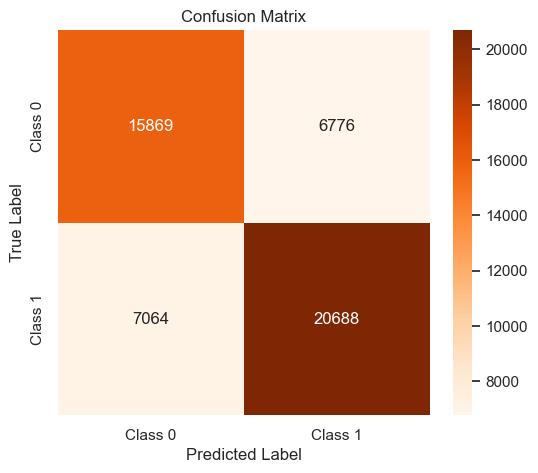

In [66]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(knn_final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


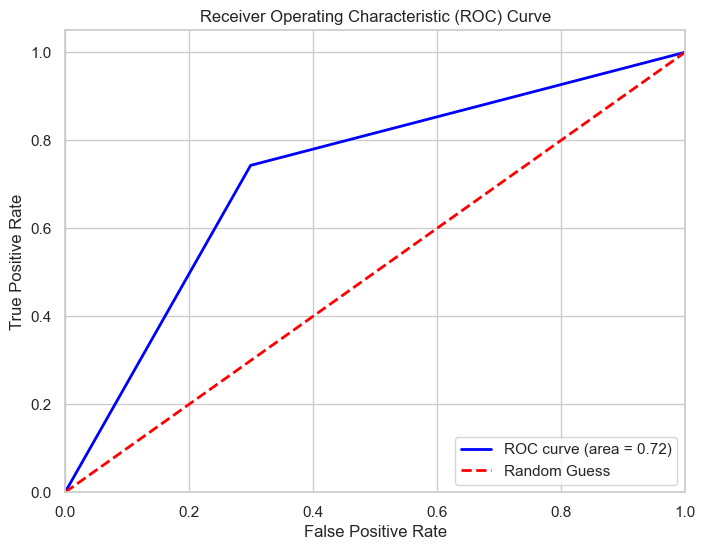

In [34]:
from sklearn.metrics import roc_curve, auc

knn_predictions_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_predictions_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest:

In [35]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Random Forest  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


Random Forest  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       



In [36]:
# # Define the expanded parameter grid for hyperparameter tuning
# param_grid = {
#     "n_estimators": [50, 100, 200, 300, 500],  # Number of trees in the forest
#     "max_depth": [None, 10, 20, 30, 40],  # Depth of trees
#     "min_samples_split": [2, 5, 10],  # Minimum samples to split
#     "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
#     "bootstrap": [True, False],  # Bootstrap sampling
#     "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider
#     "criterion": ["gini", "entropy"],  # Splitting criterion
#     "class_weight": [None, "balanced"]  # Handle class imbalance
# }

# # Perform RandomizedSearchCV for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid,
#     n_iter=20,  # Randomly sample 20 combinations
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=1,  # Use single job to avoid pickling issues
#     random_state=42
# )


# # Fit the randomized search to the data
# random_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Best Cross-Validation Accuracy: 0.9895

Manually updated model:

In [67]:
# Update Random Forest model with the best parameters
random_forest_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=40,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=False,
    max_features='sqrt',
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
rf_final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(rf_final_confusion_matrix)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       

Final Confusion Matrix:
[[22399   246]
 [  289 27463]]


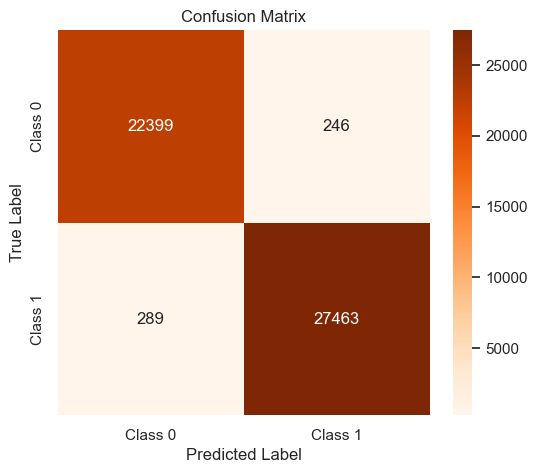

In [68]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

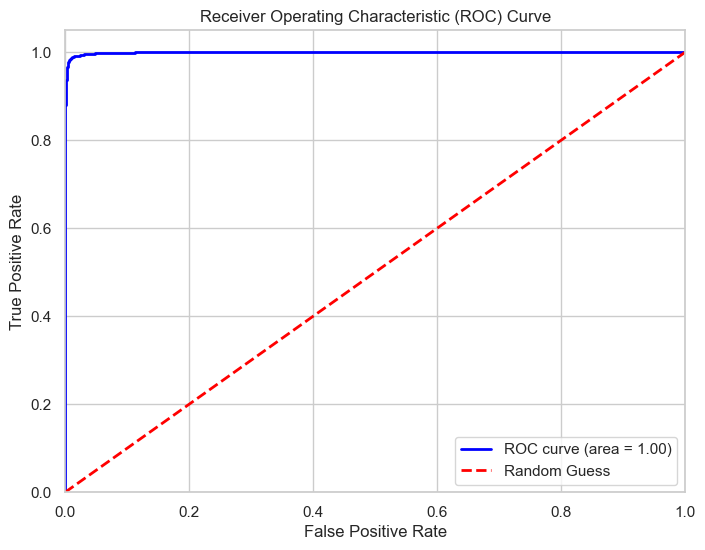

In [39]:
from sklearn.metrics import roc_curve, auc

rf_predictions_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_predictions_proba)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##########################################################################
##########################################################################
##########################################################################

Deep Learning Models:

Fully Connected Neural Network (Feedforward Neural Network):

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Build MLP Model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/20


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5442 - loss: 12.2598 - val_accuracy: 0.5937 - val_loss: 0.6602
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5905 - loss: 0.6626 - val_accuracy: 0.5589 - val_loss: 0.6607
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5949 - loss: 0.6595 - val_accuracy: 0.6117 - val_loss: 0.6485
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5971 - loss: 0.6540 - val_accuracy: 0.6335 - val_loss: 0.6401
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6061 - loss: 0.6496 - val_accuracy: 0.6167 - val_loss: 0.6398
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6111 - loss: 0.6459 - val_accuracy: 0.6118 - val_loss: 0.6363
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6120 - loss: 0.6415 - val_accuracy: 0.6437 - val_loss: 0.6196
Epoch 8/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6224 - loss: 0.6361 - val_accura

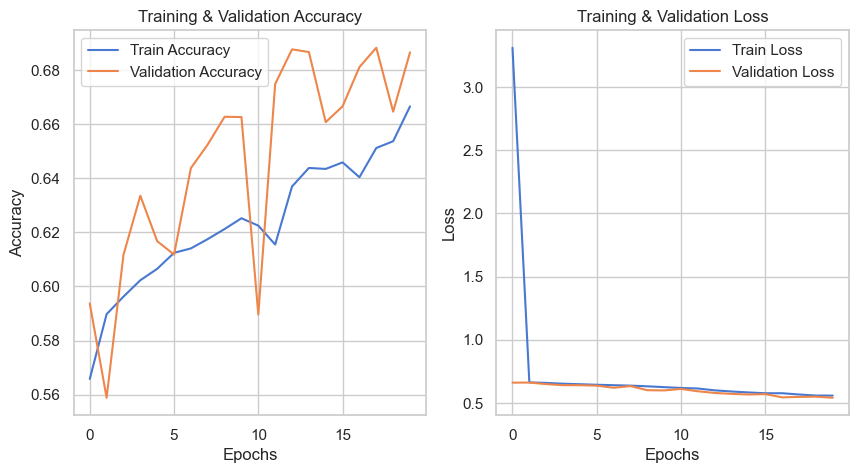

In [41]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


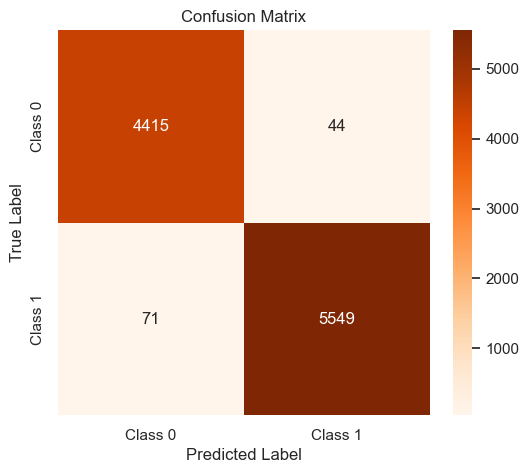

In [69]:
# Confusion Matrix
mlp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning:

Reloading Tuner from tuning_dir\mlp_tuning\tuner0.json
Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}
Epoch 1/20


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1260/1260 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5296 - loss: 12.1629 - val_accuracy: 0.6335 - val_loss: 0.7236
Epoch 2/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5690 - loss: 1.1070 - val_accuracy: 0.6325 - val_loss: 0.6492
Epoch 3/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6200 - loss: 0.6614 - val_accuracy: 0.6392 - val_loss: 0.6389
Epoch 4/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6304 - loss: 0.6459 - val_accuracy: 0.6244 - val_loss: 0.6274
Epoch 5/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6351 - loss: 0.6373 - val_accuracy: 0.6383 - val_loss: 0.6243
Epoch 6/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6383 - loss: 0.6309 - val_accuracy: 0.6674 - val_loss: 0.6129
Epoch 7/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6422 - loss: 0.6229 - val_accuracy: 0.6397 - val_loss: 0.6083
Epoch 8/20
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6489 - loss: 0.6120 - val_accura

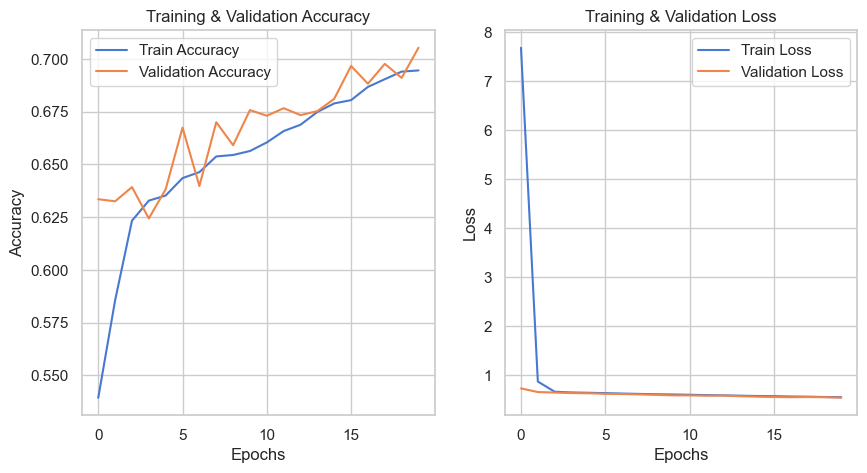

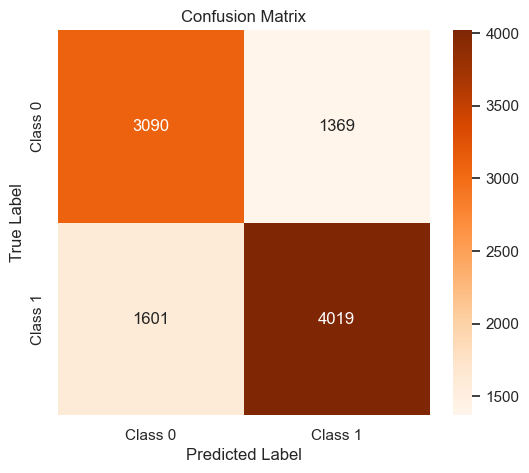

In [70]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

##################### VERSION 2
# Function to build model for hyperparameter tuning
def build_model(hp):
    mlp_model = Sequential([
        Dense(hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    mlp_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return mlp_model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='mlp_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train model with best hyperparameters
mlp_model = build_model(best_hps)
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}


Early Stopping:

Epoch 1/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7014 - loss: 0.5387 - val_accuracy: 0.7016 - val_loss: 0.5261
Epoch 2/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7019 - loss: 0.5327 - val_accuracy: 0.7117 - val_loss: 0.5174
Epoch 3/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6997 - loss: 0.5340 - val_accuracy: 0.7081 - val_loss: 0.5237
Epoch 4/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7013 - loss: 0.5336 - val_accuracy: 0.7074 - val_loss: 0.5196
Epoch 5/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7017 - loss: 0.5318 - val_accuracy: 0.7084 - val_loss: 0.5236
Epoch 6/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7066 - loss: 0.5265 - val_accuracy: 0.7203 - val_loss: 0.5050
Epoch 7/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7076 - loss: 0.5219 - val_accuracy: 0.7128 - val_loss: 0.5096
Epoch 8/50
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7125 - loss: 0.5209 - 

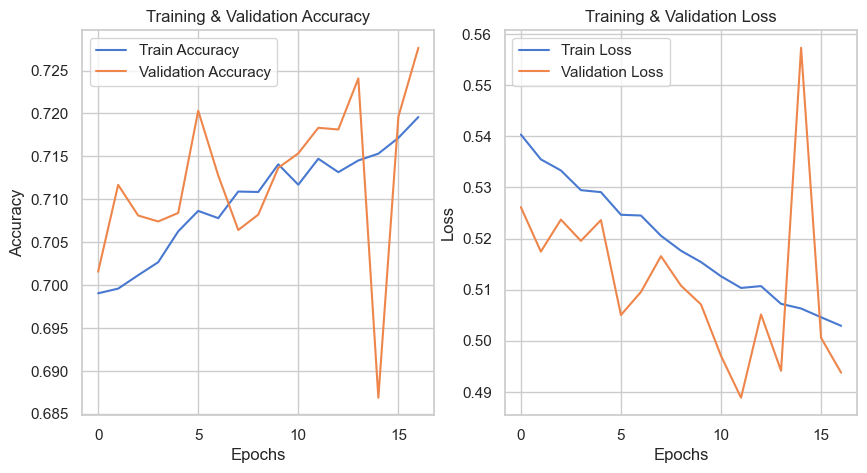

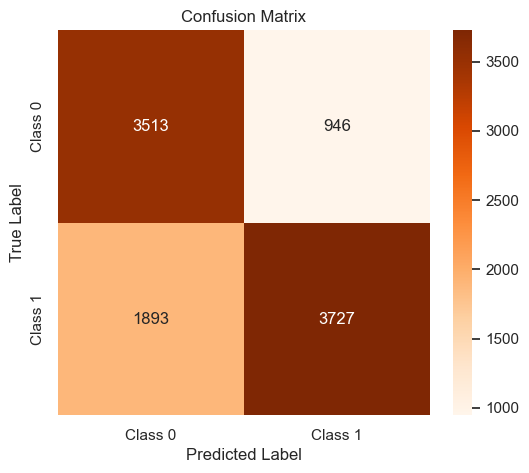

In [71]:
# Implement Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model
y_pred_probs = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
mlp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(mlp_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

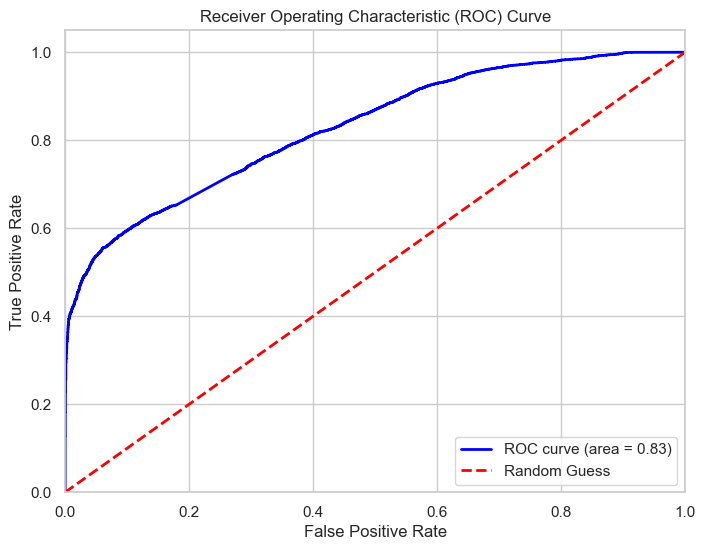

In [45]:
# Compute ROC curve and ROC area for the MLP model
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, y_pred_probs)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


TabNet:

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52838 | val_0_accuracy: 0.72676 |  0:00:04s
epoch 1  | loss: 0.4132  | val_0_accuracy: 0.83282 |  0:00:07s
epoch 2  | loss: 0.36626 | val_0_accuracy: 0.86705 |  0:00:11s
epoch 3  | loss: 0.31174 | val_0_accuracy: 0.90078 |  0:00:15s
epoch 4  | loss: 0.28821 | val_0_accuracy: 0.90297 |  0:00:18s
epoch 5  | loss: 0.25746 | val_0_accuracy: 0.92589 |  0:00:23s
epoch 6  | loss: 0.233   | val_0_accuracy: 0.924   |  0:00:27s
epoch 7  | loss: 0.22144 | val_0_accuracy: 0.93293 |  0:00:31s
epoch 8  | loss: 0.21591 | val_0_accuracy: 0.93759 |  0:00:35s
epoch 9  | loss: 0.21768 | val_0_accuracy: 0.93481 |  0:00:40s
epoch 10 | loss: 0.2018  | val_0_accuracy: 0.93432 |  0:00:44s
epoch 11 | loss: 0.1929  | val_0_accuracy: 0.91209 |  0:00:49s
epoch 12 | loss: 0.18921 | val_0_accuracy: 0.93769 |  0:00:53s
epoch 13 | loss: 0.19136 | val_0_accuracy: 0.94107 |  0:00:57s
epoch 14 | loss: 0.1913  | val_0_accuracy: 0.92281 |  0:01:01s
epoch 15 | loss: 0.19495 | val_0_accuracy: 0.94305 |  0

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9761
Precision: 0.9798
Recall: 0.9772
F1-Score: 0.9785


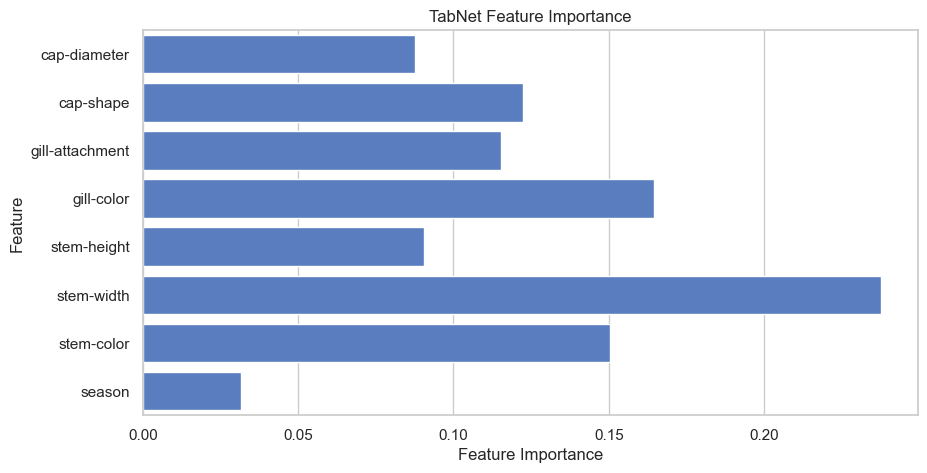

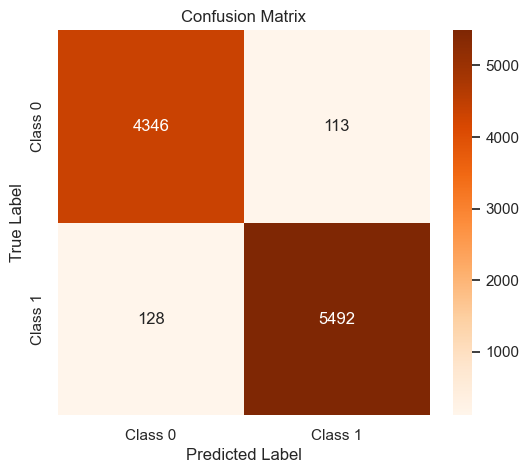

In [72]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Convert to float32 (required for TabNet) and convert DataFrame to numpy array
X_train_np = X_train.values.astype(np.float32)
X_test_np = X_test.values.astype(np.float32)
y_train_np = y_train.values
y_test_np = y_test.values

# Initialize and Train TabNet Model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train_np, y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0
)

# Predictions
y_pred_probs = tabnet_model.predict_proba(X_test_np)[:, 1]
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate Model
accuracy = accuracy_score(y_test_np, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_np, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Feature Importance
feature_importances = tabnet_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()

# Confusion Matrix
tabnet_cm = confusion_matrix(y_test_np, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(tabnet_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

[0.         0.         0.         ... 0.99686028 0.99730881 1.        ]
[0.         0.04768683 0.06281139 ... 1.         1.         1.        ]
0.9976737638859071


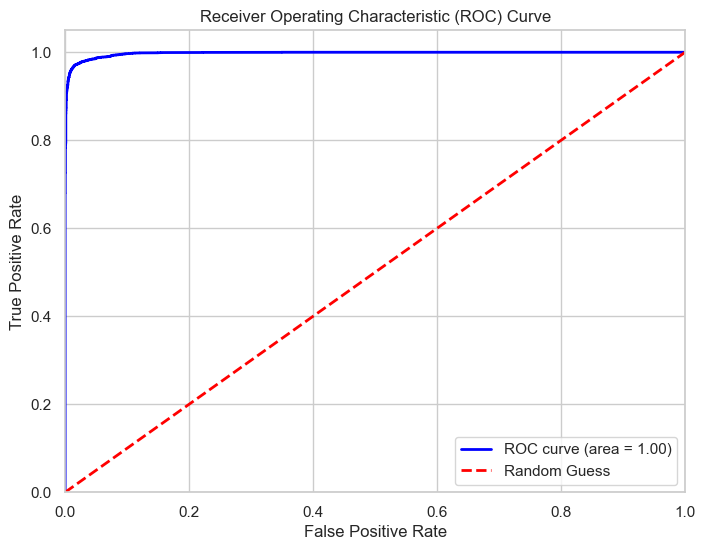

In [52]:
# Compute ROC curve and ROC area for the TabNet model
tabnet_fpr, tabnet_tpr, _ = roc_curve(y_test, y_pred_probs)
tabnet_roc_auc = auc(tabnet_fpr, tabnet_tpr)
print(tabnet_fpr)
print(tabnet_tpr)
print(tabnet_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(tabnet_fpr, tabnet_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % tabnet_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ANN:

In [54]:
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Dropout, BatchNormalization
import optuna

# # Define the objective function for Optuna
# def objective(trial):
#     # Hyperparameters to tune
#     num_layers = trial.suggest_int("num_layers", 2, 5)
#     num_neurons = trial.suggest_int("num_neurons", 32, 256)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
#     learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
#     batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])
#     optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])

#     # Select optimizer
#     if optimizer_name == "adam":
#         optimizer = Adam(learning_rate=learning_rate)
#     elif optimizer_name == "rmsprop":
#         optimizer = RMSprop(learning_rate=learning_rate)
#     else:
#         optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

#     # Define ANN model
#     ann_model = Sequential()
#     ann_model.add(Dense(num_neurons, activation="relu", input_shape=(X_train.shape[1],)))
#     ann_model.add(BatchNormalization())
#     ann_model.add(Dropout(dropout_rate))

#     # Add hidden layers dynamically
#     for _ in range(num_layers - 1):
#         ann_model.add(Dense(num_neurons, activation="relu"))
#         ann_model.add(BatchNormalization())
#         ann_model.add(Dropout(dropout_rate))

#     # Output layer
#     ann_model.add(Dense(1, activation="sigmoid"))

#     # Compile the model
#     ann_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

#     # Train model with early stopping
#     early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
#     history = ann_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test),
#                         verbose=0, callbacks=[early_stopping])

#     # Make predictions
#     y_pred_prob = ann_model.predict(X_test)
#     y_pred_binary = (y_pred_prob > 0.5).astype(int)

#     # Compute F1-score
#     _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred_binary, average="macro")

#     return f1  # Optimize for macro F1-score

# # Run Optuna study to find the best hyperparameters
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Retrieve the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'num_layers': 3, 'num_neurons': 164, 'dropout_rate': 0.10439015693267226, 'learning_rate': 0.0017539414374108486, 'batch_size': 256, 'optimizer': 'adam'}


Epoch 1/100


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6119 - loss: 0.6845 - val_accuracy: 0.6280 - val_loss: 0.6389
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6668 - loss: 0.6009 - val_accuracy: 0.6472 - val_loss: 0.6077
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6992 - loss: 0.5533 - val_accuracy: 0.6563 - val_loss: 0.6001
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7239 - loss: 0.5255 - val_accuracy: 0.6657 - val_loss: 0.5837
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7339 - loss: 0.5097 - val_accuracy: 0.6767 - val_loss: 0.5877
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7527 - loss: 0.4802 - val_accuracy: 0.7296 - val_loss: 0.5315
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7599 - loss: 0.4740 - val_accuracy: 0.7197 - val_loss: 0.5448
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7719 - loss: 0.4535 - val_accuracy: 0.7742

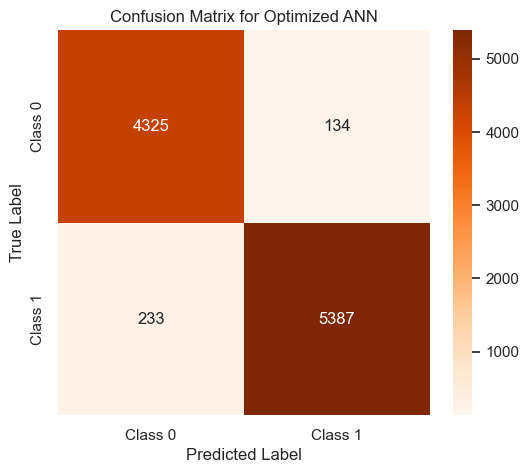

In [73]:
# Train final ANN model with the best parameters
ann_model = Sequential()
ann_model.add(Dense(164, activation="relu", input_shape=(X_train.shape[1],)))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.10439015693267226))

for _ in range(3 - 1):
    ann_model.add(Dense(164, activation="relu"))
    ann_model.add(BatchNormalization())
    ann_model.add(Dropout(0.10439015693267226))

ann_model.add(Dense(1, activation="sigmoid"))

# Select optimizer
# if best_params["optimizer"] == "adam":
optimizer = Adam(learning_rate=0.0017539414374108486)
# elif 'adam' == "rmsprop":
#     optimizer = RMSprop(learning_rate=0.0017539414374108486)
# else:
#     optimizer = SGD(learning_rate=0.0017539414374108486, momentum=0.9)

# Compile model
ann_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the final model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test),
                    verbose=1, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

# Make final predictions
y_pred_prob = ann_model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Compute final performance metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_binary, labels=[0, 1], zero_division=0)
accuracy = accuracy_score(y_test, y_pred_binary)
ann_cm = confusion_matrix(y_test, y_pred_binary)

# Print evaluation report
report = f"""
ANN - Optimized Model Evaluation

{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}
{'-'*55}
{0:<12}{precision[0]:<12.2f}{recall[0]:<12.2f}{f1[0]:<12.2f}{int(support[0]):<12}
{1:<12}{precision[1]:<12.2f}{recall[1]:<12.2f}{f1[1]:<12.2f}{int(support[1]):<12}

{'Accuracy':<12}{accuracy:<12.2f}
{'Macro Avg':<12}{np.mean(precision):<12.2f}{np.mean(recall):<12.2f}{np.mean(f1):<12.2f}{sum(support):<12}
"""

print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized ANN")
plt.show()

0.9882036730064908


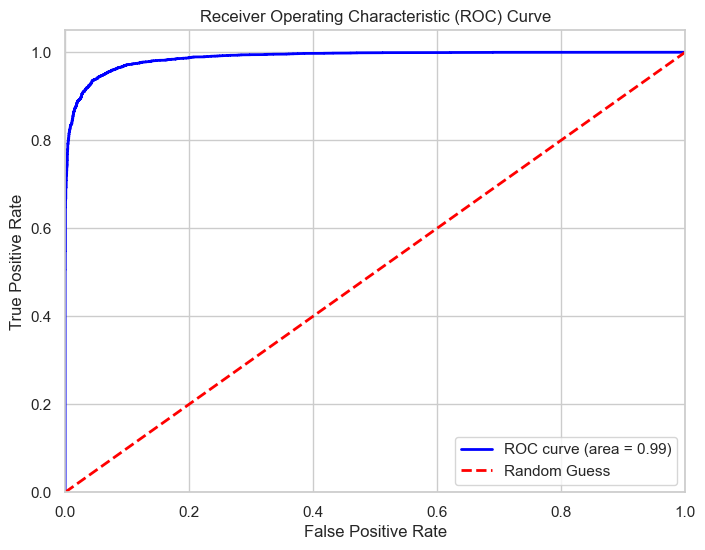

In [59]:
# Compute ROC curve and ROC area for the ANN model
ann_fpr, ann_tpr, _ = roc_curve(y_test, y_pred_prob)
ann_roc_auc = auc(ann_fpr, ann_tpr)

print(ann_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ann_fpr, ann_tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12481 10164]
 [ 7517 20235]]


 K-Nearest Neighbors - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.70        4529        
1           0.75        0.75        0.75        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.73        0.73        0.73        10079       

Final Confusion Matrix:
[[15869  6776]
 [ 7064 20688]]

 Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       

Final Confusion Matrix:
[[22399   246]
 [  289 27463]]


MLP:
 Accuracy: 0.7366
Precision: 0.8194
Recall: 0.6767
F1-Score: 0.7413


Tabnet:
Accuracy: 0.9761
Precision: 0.9798
Recall: 0.9772
F1-Score: 0.9785


ANN - Optimized Model Evaluation:

Class       Precision   Recall      F1-Score    Support     
-------------------------------------------------------
0           0.95        0.97        0.96        4459        
1           0.98        0.96        0.97        5620        

Accuracy    0.97        
Macro Avg   0.96        0.97        0.97        10079      

~##################################################################################################################


Comparison:

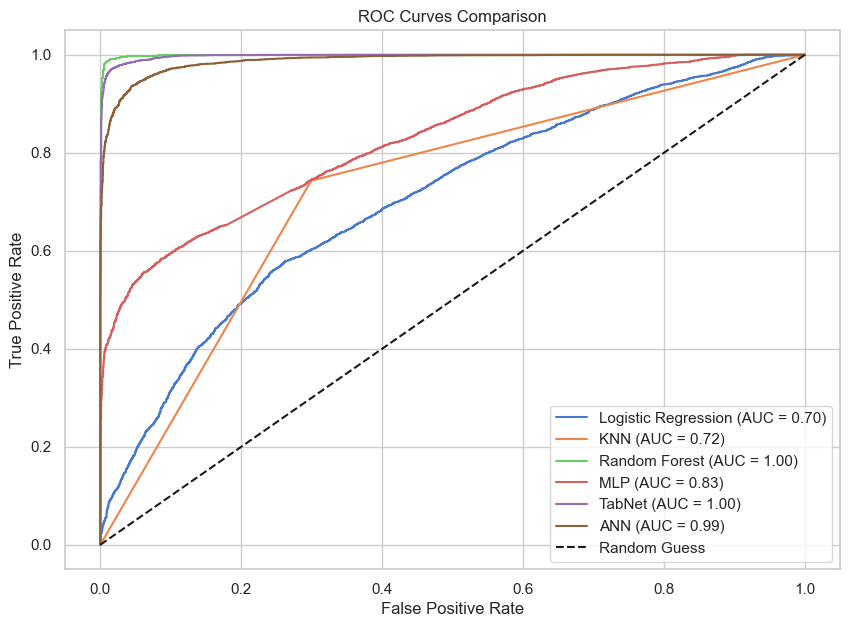

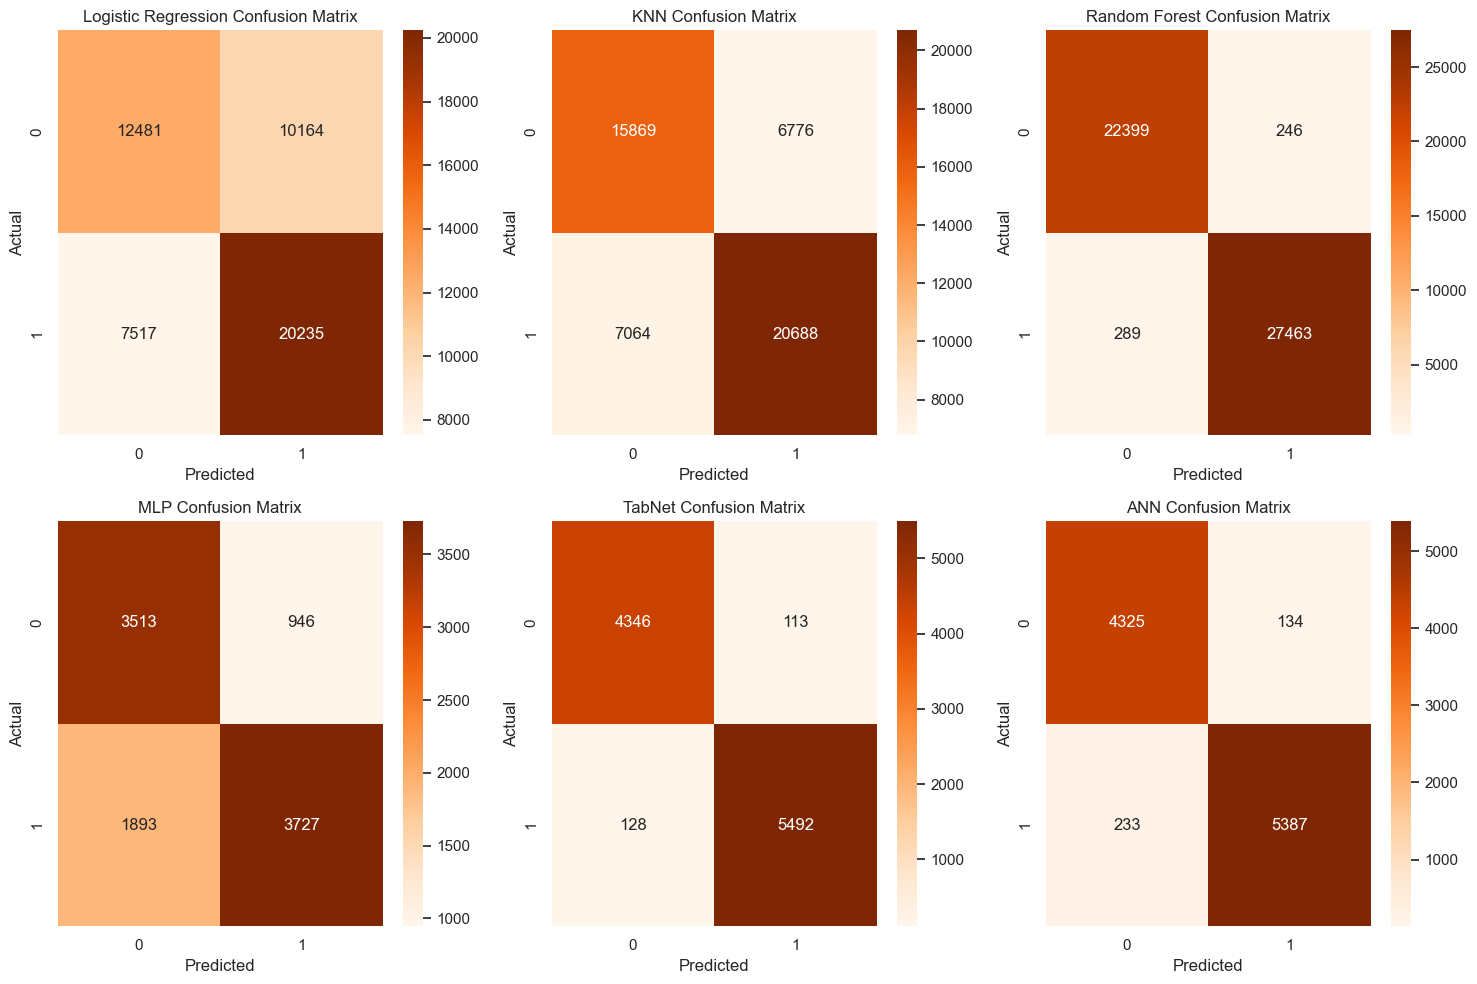

In [81]:
# Plot ROC curves for all models together
plt.figure(figsize=(10, 7))

# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_roc_auc:.2f})')

# KNN
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_roc_auc:.2f})')

# Random Forest
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# MLP
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP (AUC = {mlp_roc_auc:.2f})')

# TabNet
plt.plot(tabnet_fpr, tabnet_tpr, label=f'TabNet (AUC = {tabnet_roc_auc:.2f})')

# ANN
plt.plot(ann_fpr, ann_tpr, label=f'ANN (AUC = {ann_roc_auc:.2f})')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# List of models and their confusion matrices
models_cm = [
    ('Logistic Regression', logistic_final_confusion_matrix),
    ('KNN', knn_final_confusion_matrix),
    ('Random Forest', rf_final_confusion_matrix),
    ('MLP', mlp_cm),
    ('TabNet', tabnet_cm),
    ('ANN', ann_cm)
]

for idx, (name, cm) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()



C:\Users\Dorra\AppData\Local\Temp\ipykernel_7500\4002252038.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dorra\AppData\Local\Temp\ipykernel_7500\4002252038.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
C:\Users\Dorra\AppData\Local\Temp\ipykernel_7500\4002252038.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dorra\AppData\Local\Temp\ipykernel_7500\4002252038.py:75: UserWarning: No artists with labels found to put in legend.  No

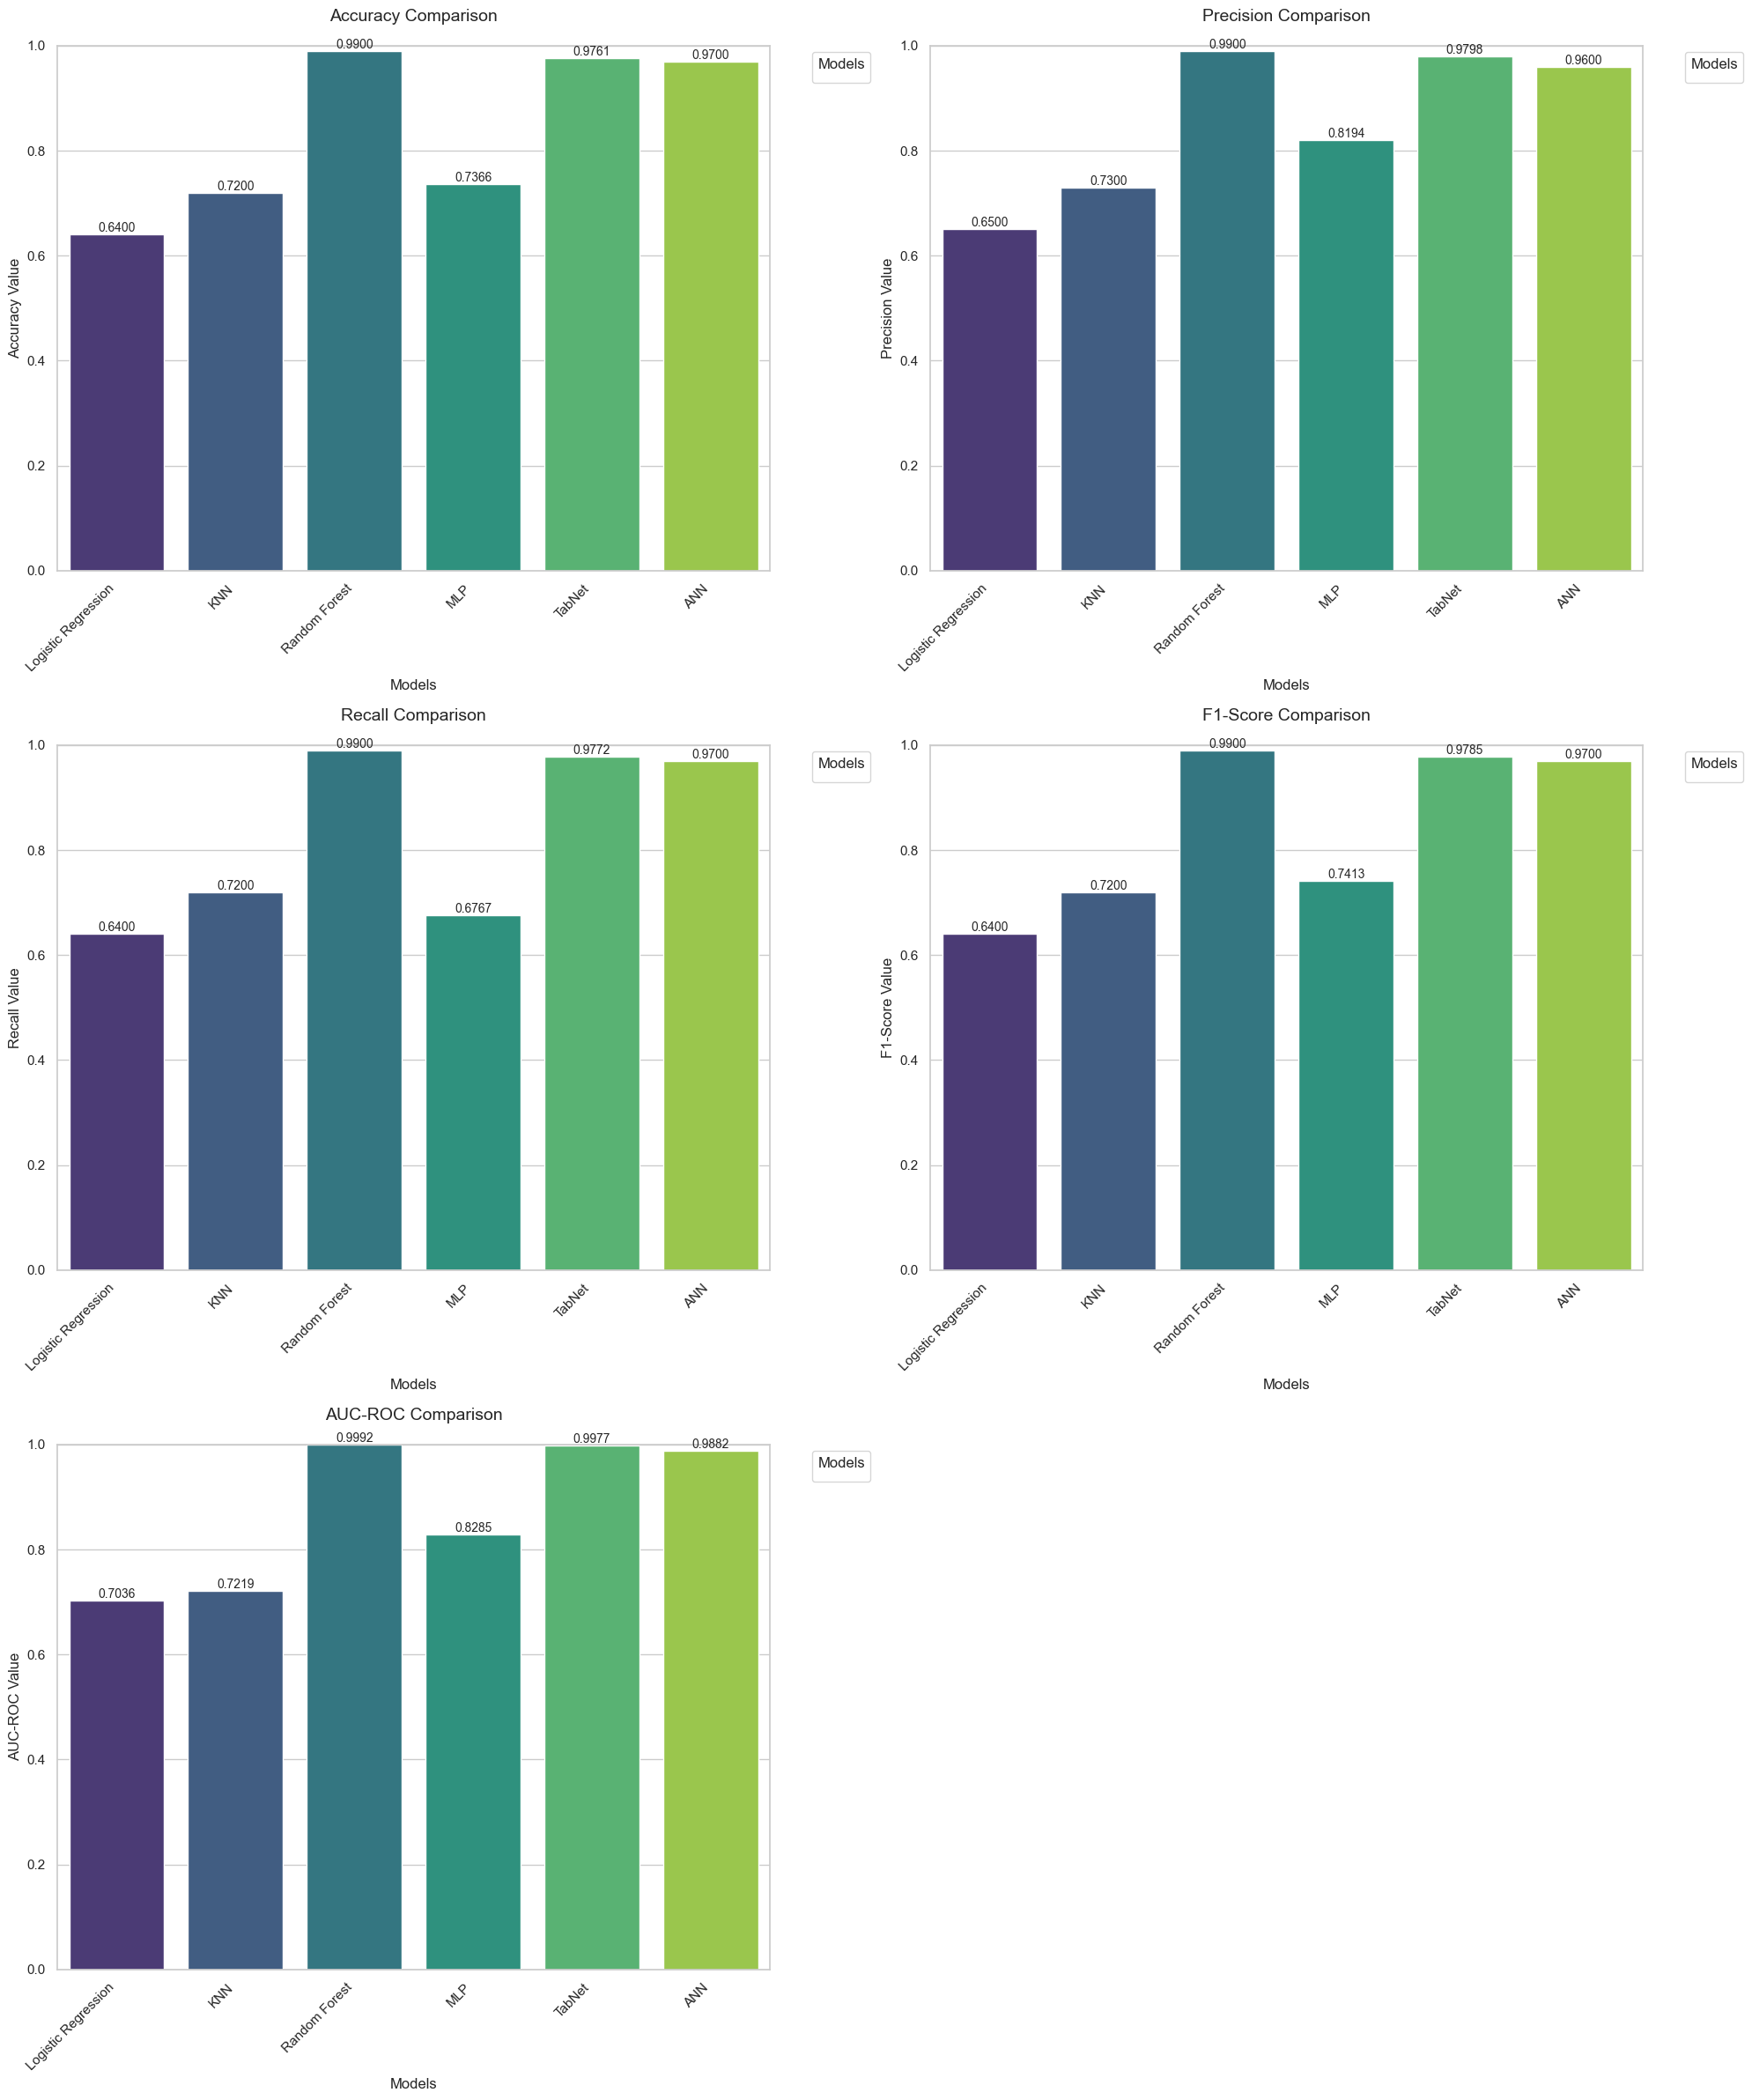

In [94]:
# Create performance comparison bar plots
models = ['Logistic Regression', 'KNN', 'Random Forest', 'MLP', 'TabNet', 'ANN']

# Extract actual metrics from model results
metrics = {
    'Accuracy': [
        0.64,  # Logistic Regression accuracy
        0.72,  # KNN accuracy
        0.99,  # Random Forest accuracy 
        0.7366,  # MLP accuracy
        0.9761,  # TabNet accuracy
        0.97   # ANN accuracy
    ],
    'Precision': [
        0.65,  # Logistic Regression precision
        0.73,  # KNN precision
        0.99,  # Random Forest precision
        0.8194,  # MLP precision
        0.9798,  # TabNet precision
        0.96   # ANN precision (avg of 0.95 and 0.98)
    ],
    'Recall': [
        0.64,  # Logistic Regression recall
        0.72,  # KNN recall
        0.99,  # Random Forest recall
        0.6767,  # MLP recall
        0.9772,  # TabNet recall
        0.97   # ANN recall (avg of 0.97 and 0.96)
    ],
    'F1-Score': [
        0.64,  # Logistic Regression f1
        0.72,  # KNN f1
        0.99,  # Random Forest f1
        0.7413,  # MLP f1
        0.9785,  # TabNet f1
        0.97   # ANN f1 (avg of 0.96 and 0.97)
    ],
    'AUC-ROC': [
        logistic_roc_auc,  # Logistic Regression AUC-ROC
        knn_roc_auc,       # KNN AUC-ROC
        rf_roc_auc,        # Random Forest AUC-ROC
        mlp_roc_auc,       # MLP AUC-ROC
        tabnet_roc_auc,    # TabNet AUC-ROC
        ann_roc_auc        # ANN AUC-ROC
    ]
}

# Create a figure with 3x2 subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
axes = axes.ravel()

# Plot each metric
for idx, (metric, values) in enumerate(metrics.items()):
    # Create DataFrame for better legend handling
    df = pd.DataFrame({
        'Model': models,
        'Value': values
    })
    
    # Create bar plot with legend
    bars = sns.barplot(x='Model', y='Value', data=df, palette="viridis", 
                      hue='Model', dodge=False, ax=axes[idx])
    
    axes[idx].set_title(f'{metric} Comparison', fontsize=14, pad=20)
    axes[idx].set_xlabel('Models', fontsize=12)
    axes[idx].set_ylabel(f'{metric} Value', fontsize=12)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].set_ylim(0, 1)
    
    # Add value labels on top of each bar
    for i, v in enumerate(values):
        bars.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Customize legend
    axes[idx].legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

Explainability with SHAP :

In [100]:
# Import SHAP
import shap

# Convert data to numpy arrays if they aren't already
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test

# Create a smaller background dataset and test sample
background_data = shap.utils.sample(X_train_np, 25)  # Reduced background samples
test_sample = shap.utils.sample(X_test_np, 2)  # Reduced test samples

print("Starting SHAP calculations...")

# Logistic Regression Explainer
print("Computing SHAP values for Logistic Regression...")
def lr_predict(x):
    return logistic_model.predict_proba(x)
explainer_lr = shap.KernelExplainer(lr_predict, background_data, nsamples=100)
shap_values_lr = explainer_lr.shap_values(test_sample)

# KNN Explainer
print("Computing SHAP values for KNN...")
def knn_predict(x):
    return knn_model.predict_proba(x)
explainer_knn = shap.KernelExplainer(knn_predict, background_data, nsamples=100)
shap_values_knn = explainer_knn.shap_values(test_sample)

# Random Forest Explainer (fastest)
print("Computing SHAP values for Random Forest...")
explainer_rf = shap.TreeExplainer(random_forest_model)
shap_values_rf = explainer_rf(test_sample)

# TabNet Explainer
print("Computing SHAP values for TabNet...")
def tabnet_predict(x):
    return tabnet_model.predict_proba(x.astype(np.float32))
explainer_tabnet = shap.KernelExplainer(tabnet_predict, background_data.astype(np.float32), nsamples=100)
shap_values_tabnet = explainer_tabnet.shap_values(test_sample.astype(np.float32))

# MLP Explainer
print("Computing SHAP values for MLP...")
def mlp_predict(x):
    return mlp_model.predict(x)  # Using predict instead of predict_proba
explainer_mlp = shap.KernelExplainer(mlp_predict, background_data, nsamples=100)
shap_values_mlp = explainer_mlp.shap_values(test_sample)

# ANN Explainer
print("Computing SHAP values for ANN...")
def ann_predict(x):
    return ann_model.predict(x)  # Using predict instead of predict_proba
explainer_ann = shap.KernelExplainer(ann_predict, background_data, nsamples=100)
shap_values_ann = explainer_ann.shap_values(test_sample)

print("SHAP values calculated successfully for all models!")

Starting SHAP calculations...
Computing SHAP values for Logistic Regression...


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

Computing SHAP values for KNN...


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid featu

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Computing SHAP values for Random Forest...


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Computing SHAP values for TabNet...


  0%|          | 0/2 [00:00<?, ?it/s]

Computing SHAP values for MLP...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  0%|          | 0/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Computing SHAP values for ANN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 0/2 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
SHAP values calculated successfully for all models!


In [128]:
# First, let's print shapes to understand what we're working with
print("\nShape Analysis:")
print(f"X_test shape: {X_test.shape}")

print("\nSHAP Values shapes:")
print(f"Logistic Regression: {np.array(shap_values_lr[1]).shape}")
print(f"KNN: {np.array(shap_values_knn[1]).shape}")
print(f"Random Forest: {shap_values_rf.values.shape}")
print(f"TabNet: {np.array(shap_values_tabnet[1]).shape}")
print(f"MLP: {np.array(shap_values_mlp).shape}")
print(f"ANN: {np.array(shap_values_ann).shape}")

# Now let's modify the visualization code
plt.figure(figsize=(20, 30))

# List of models and their SHAP values
model_shaps = [
    ('Logistic Regression', shap_values_lr[1]),
    ('KNN', shap_values_knn[1]),
    ('Random Forest', shap_values_rf.values[:,:,1]),
    ('TabNet', shap_values_tabnet[1]),
    ('MLP', shap_values_mlp),
    ('ANN', shap_values_ann)
]

# Plot SHAP summary plots for each model
for idx, (name, shap_values) in enumerate(model_shaps, 1):
    plt.subplot(3, 2, idx)
    
    # Convert to numpy array if not already
    shap_values_np = np.array(shap_values)
    
    # Get the correct subset of feature data
    feature_data = X_test.iloc[:shap_values_np.shape[0]]
    
    print(f"\n{name}:")
    print(f"SHAP values shape: {shap_values_np.shape}")
    print(f"Feature data shape: {feature_data.shape}")
    
    try:
        shap.summary_plot(
            shap_values_np,
            feature_data,
            plot_type="bar",
            show=False
        )
        plt.title(f"{name} - Feature Importance", fontsize=12, pad=20)
    except Exception as e:
        print(f"Error plotting {name}: {str(e)}")




Shape Analysis:
X_test shape: (10079, 8)

SHAP Values shapes:
Logistic Regression: (8, 2)
KNN: (8, 2)
Random Forest: (2, 8, 2)
TabNet: (8, 2)
MLP: (2, 8, 1)
ANN: (2, 8, 1)

Logistic Regression:
SHAP values shape: (8, 2)
Feature data shape: (8, 8)
Error plotting Logistic Regression: The shape of the shap_values matrix does not match the shape of the provided data matrix.

KNN:
SHAP values shape: (8, 2)
Feature data shape: (8, 8)
Error plotting KNN: The shape of the shap_values matrix does not match the shape of the provided data matrix.

Random Forest:
SHAP values shape: (2, 8)
Feature data shape: (2, 8)

TabNet:
SHAP values shape: (8, 2)
Feature data shape: (8, 8)
Error plotting TabNet: The shape of the shap_values matrix does not match the shape of the provided data matrix.

MLP:
SHAP values shape: (2, 8, 1)
Feature data shape: (2, 8)

ANN:
SHAP values shape: (2, 8, 1)
Feature data shape: (2, 8)



LOGISTIC REGRESSION - FEATURE IMPORTANCE



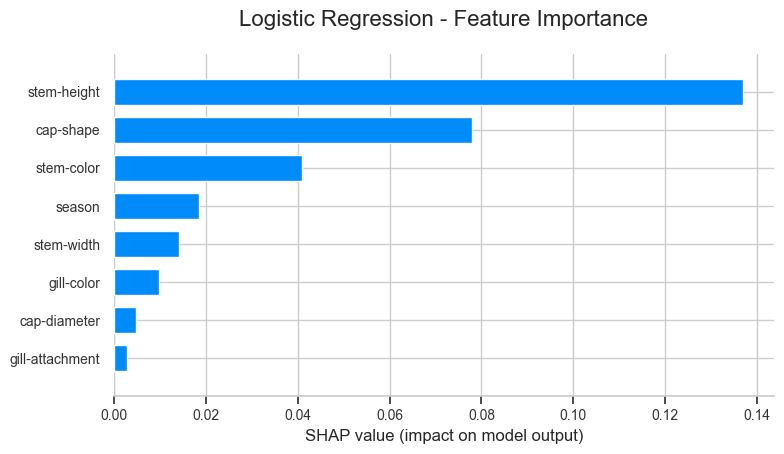


KNN - FEATURE IMPORTANCE



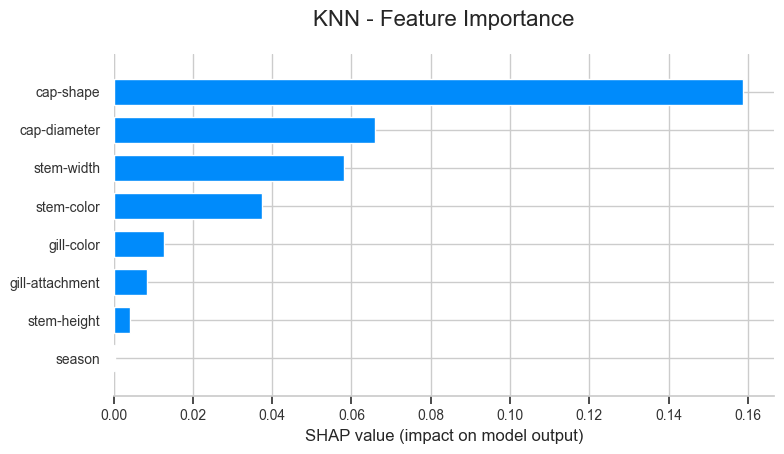


RANDOM FOREST - FEATURE IMPORTANCE



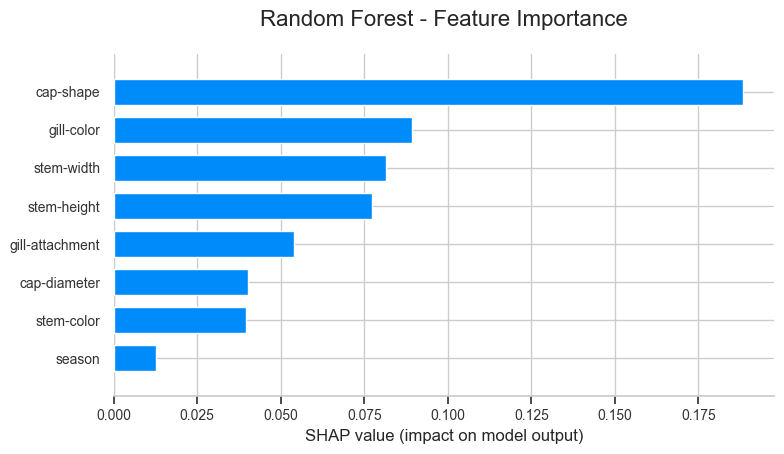


TABNET - FEATURE IMPORTANCE



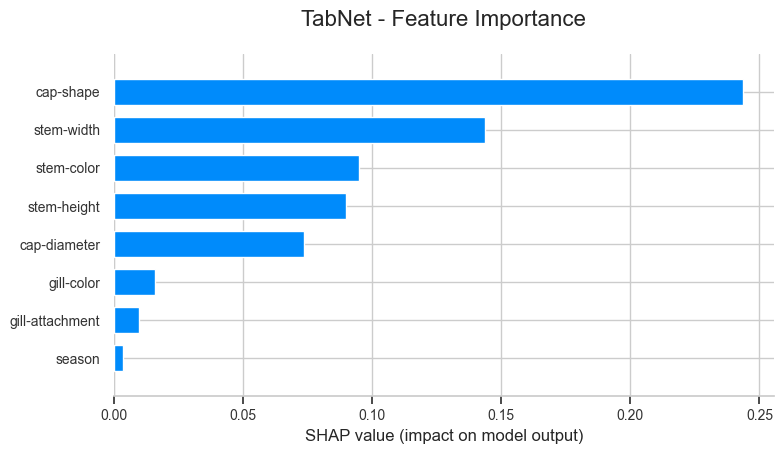


MLP - FEATURE IMPORTANCE



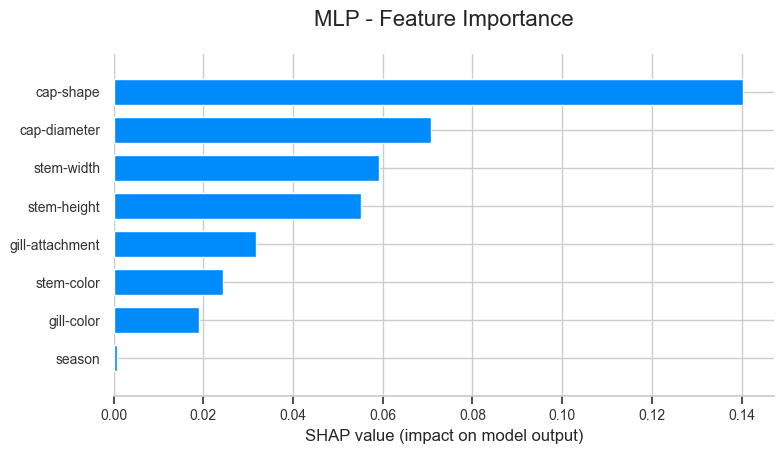


ANN - FEATURE IMPORTANCE



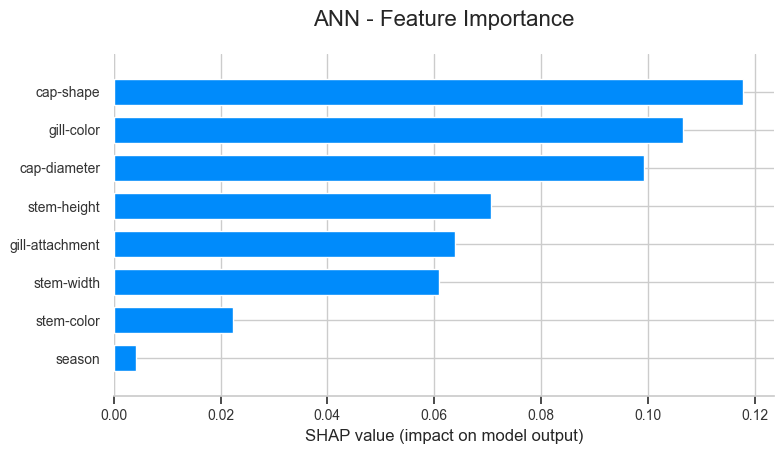

In [146]:
print("FEATURE IMPORTANCE")

print("\n" + "="*50)
print("LOGISTIC REGRESSION - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = np.array(shap_values_lr[1]).T
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("Logistic Regression - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()




print("\n" + "="*50)
print("KNN - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = np.array(shap_values_knn[1]).T
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("KNN - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



print("\n" + "="*50)
print("RANDOM FOREST - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = shap_values_rf.values[:,:,1]
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("Random Forest - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("TABNET - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = np.array(shap_values_tabnet[1]).T
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("TabNet - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



print("\n" + "="*50)
print("MLP - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = np.array(shap_values_mlp).reshape(2, 8)
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("MLP - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("ANN - FEATURE IMPORTANCE")
print("="*50 + "\n")

plt.figure(figsize=(20, 10))
shap_values = np.array(shap_values_ann).reshape(2, 8)
feature_data = X_test.iloc[:shap_values.shape[0]]

shap.summary_plot(
    shap_values,
    feature_data,
    plot_type="bar",
    show=False,
    max_display=8
)

plt.title("ANN - Feature Importance", fontsize=16, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


WATERFALL PLOTS - FEATURE CONTRIBUTIONS TO INDIVIDUAL PREDICTIONS



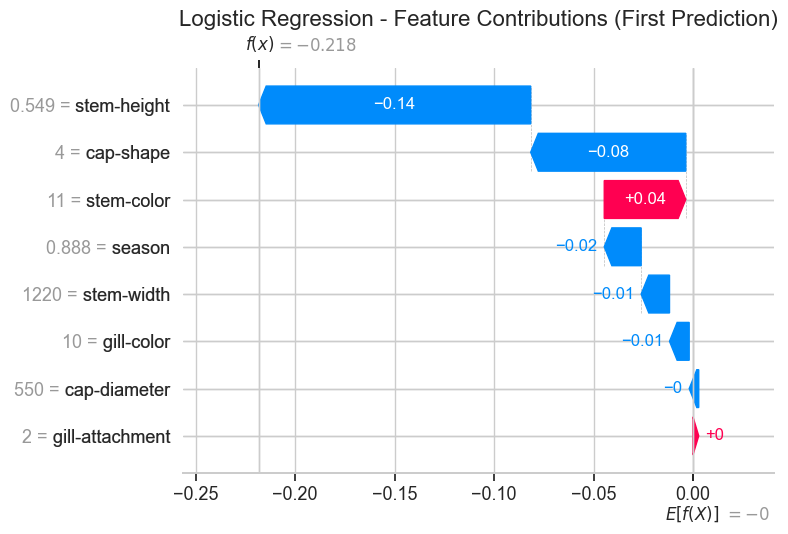

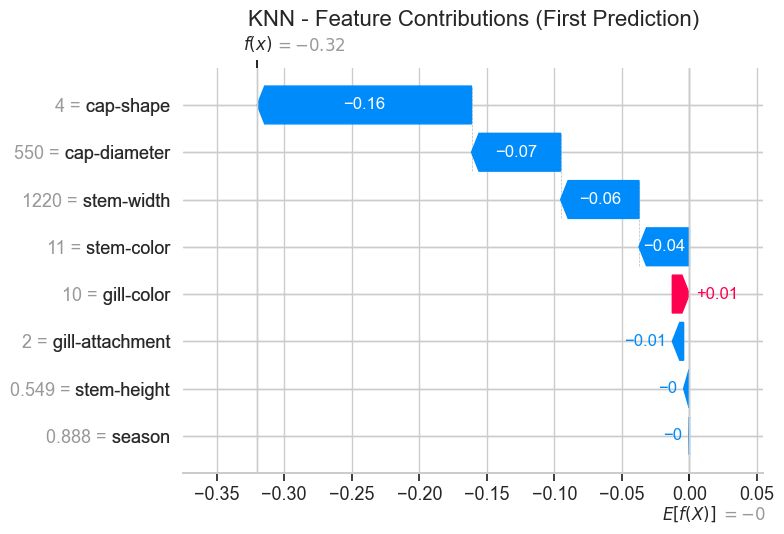

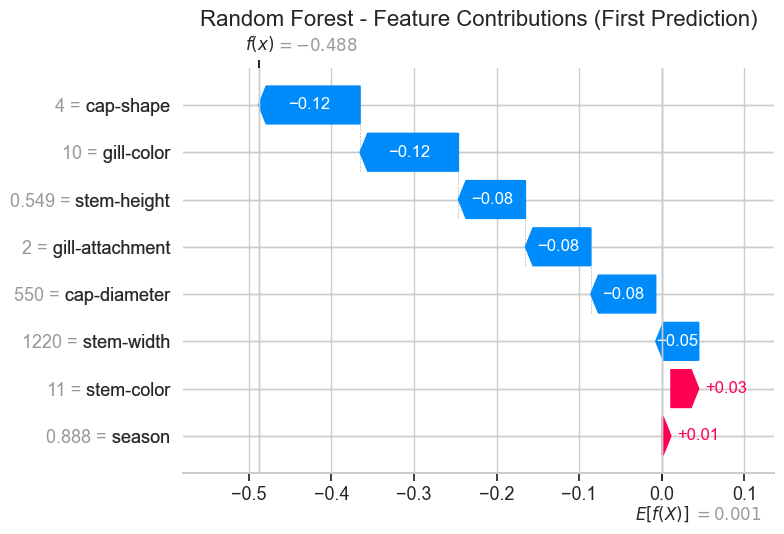

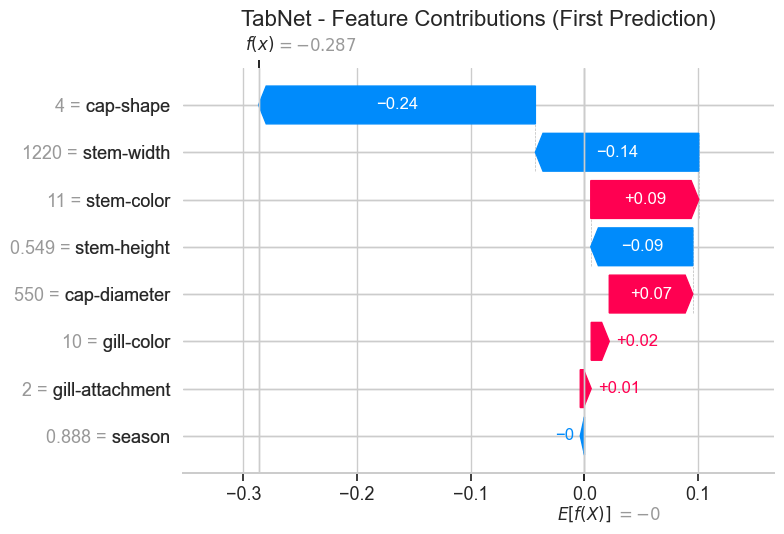

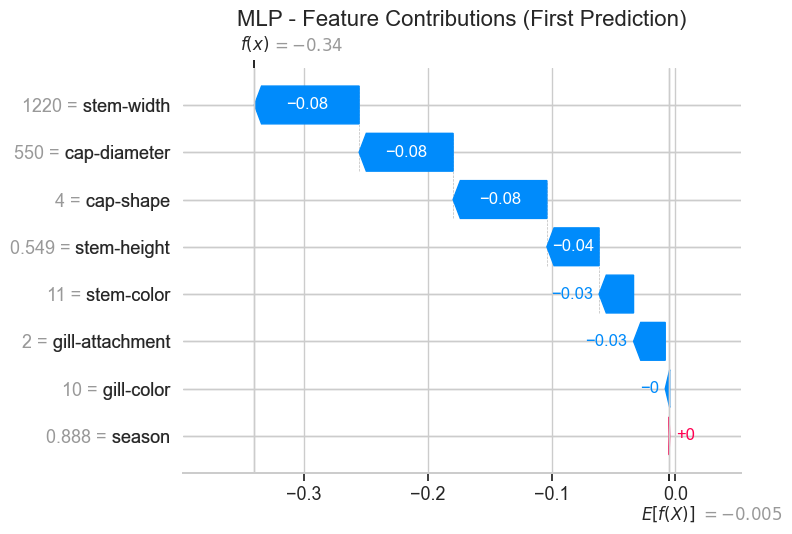

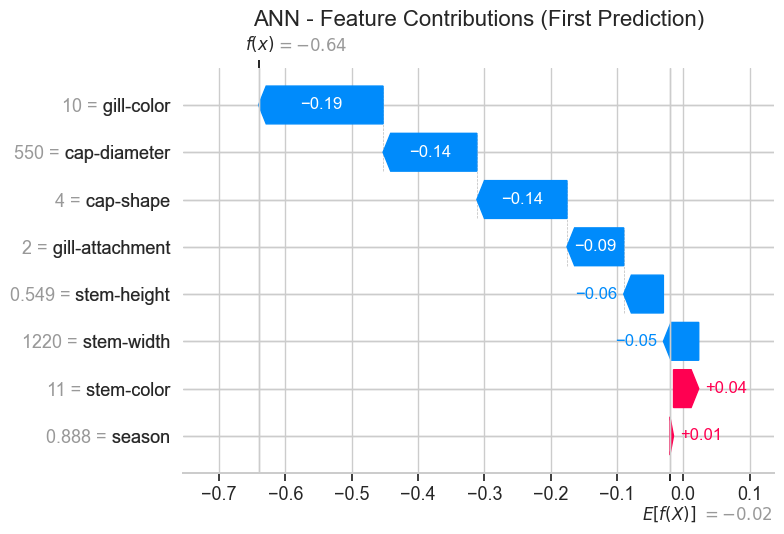

In [151]:
print("\n" + "="*50)
print("WATERFALL PLOTS - FEATURE CONTRIBUTIONS TO INDIVIDUAL PREDICTIONS")
print("="*50 + "\n")

# List of models and their SHAP values
model_shaps = [
    ('Logistic Regression', np.array(shap_values_lr[1]).T),
    ('KNN', np.array(shap_values_knn[1]).T),
    ('Random Forest', shap_values_rf.values[:,:,1]),
    ('TabNet', np.array(shap_values_tabnet[1]).T),
    ('MLP', np.array(shap_values_mlp).reshape(2, 8)),
    ('ANN', np.array(shap_values_ann).reshape(2, 8))
]

# Loop through each model and plot waterfall plots
for idx, (name, shap_values) in enumerate(model_shaps):
    plt.figure(figsize=(20, 10))  # Create a new figure for each plot
    
    # Get first sample SHAP values
    first_sample_values = shap_values[0]
    
    # Create explanation object
    explanation = shap.Explanation(
        values=first_sample_values,
        base_values=np.mean(shap_values),
        data=X_test.iloc[0],
        feature_names=X_test.columns
    )
    
    # Plot waterfall
    shap.waterfall_plot(explanation, show=False)
    plt.title(f"{name} - Feature Contributions (First Prediction)", fontsize=16)
    plt.tight_layout()
    plt.show()  # Display the plot for the current model


3. FORCE PLOTS - FEATURE IMPACT VISUALIZATION



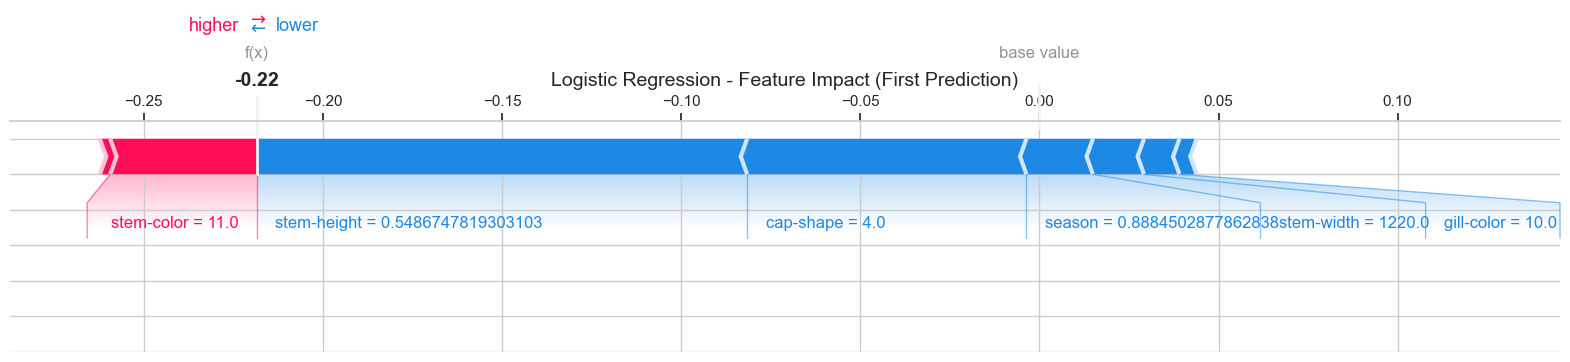

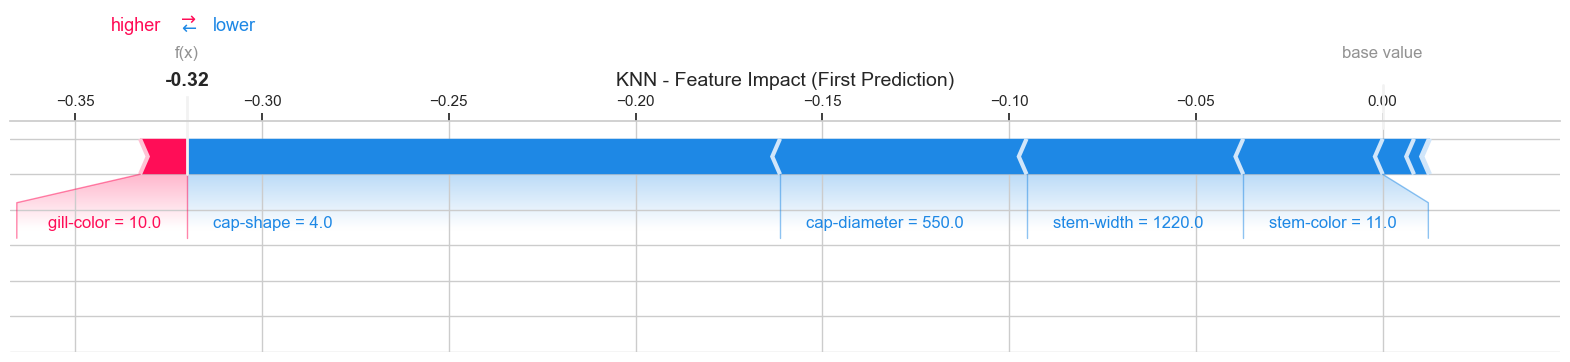

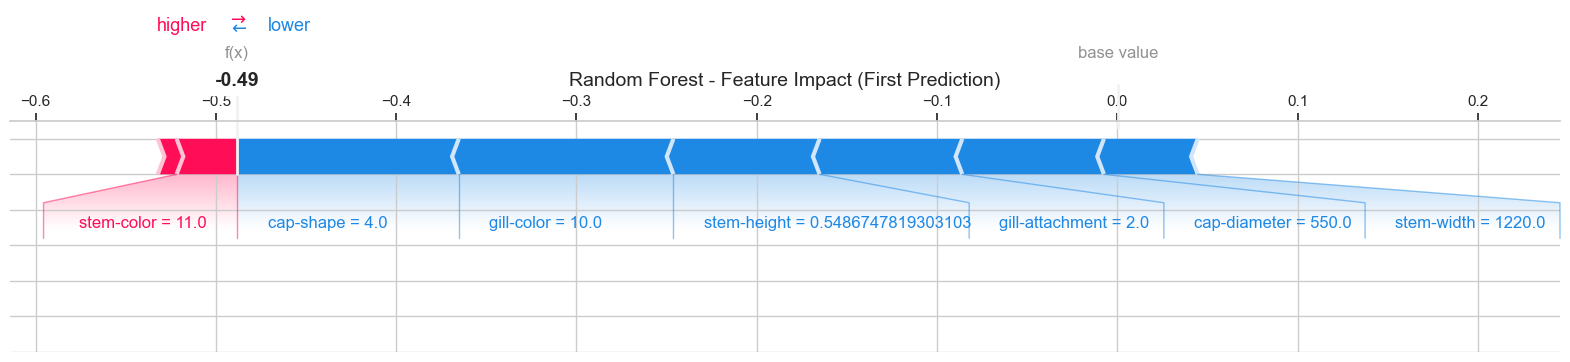

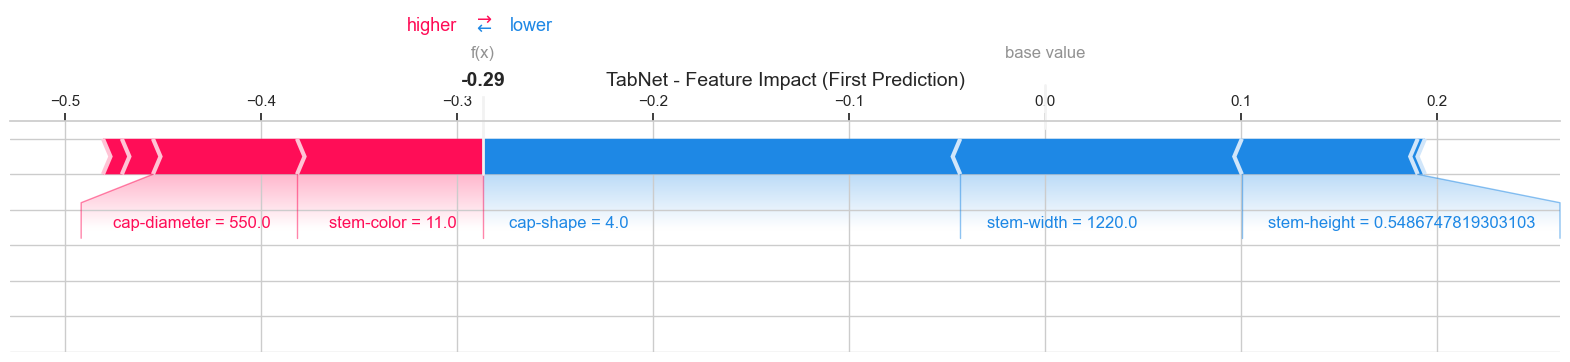

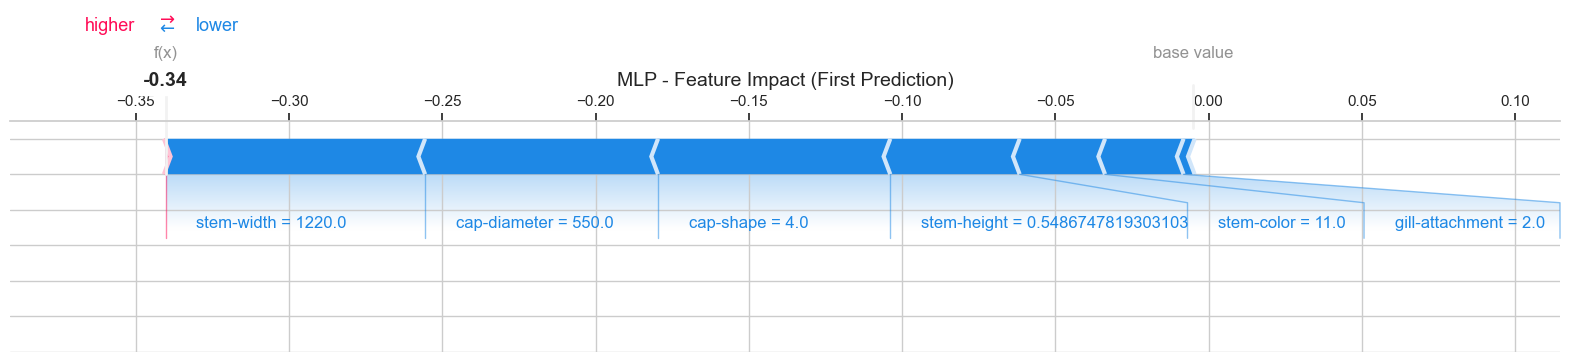

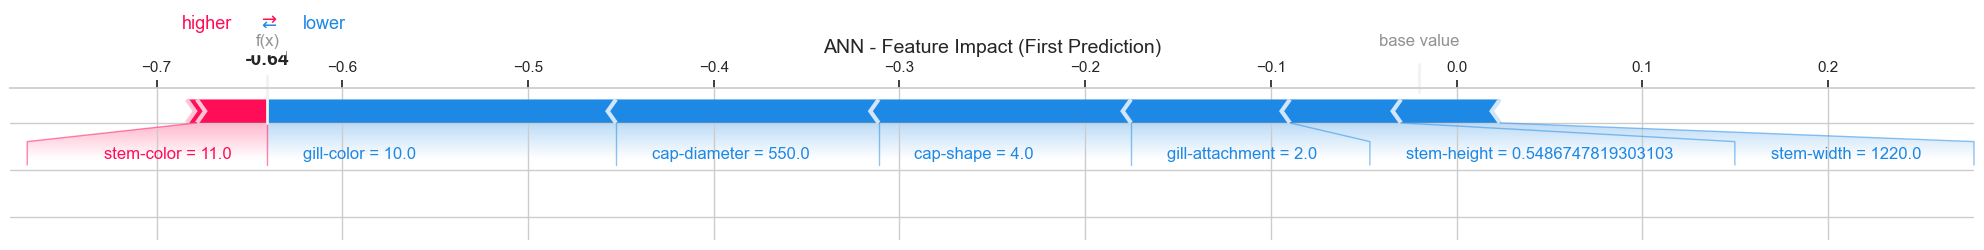

In [160]:
print("\n" + "="*50)
print("3. FORCE PLOTS - FEATURE IMPACT VISUALIZATION")
print("="*50 + "\n")

# 3. Force Plots
for idx, (name, shap_values) in enumerate(model_shaps, 1):
    
    # Create force plot
    shap.force_plot(
        base_value=np.mean(shap_values),
        shap_values=shap_values[0],
        features=X_test.iloc[0],
        feature_names=list(X_test.columns),
        matplotlib=True,
        show=False
    )
    plt.title(f"{name} - Feature Impact (First Prediction)", fontsize=14)
plt.tight_layout(h_pad=5, w_pad=3)
plt.show()


4. TOP 5 IMPORTANT FEATURES COMPARISON ACROSS MODELS



<Figure size 5000x2500 with 0 Axes>

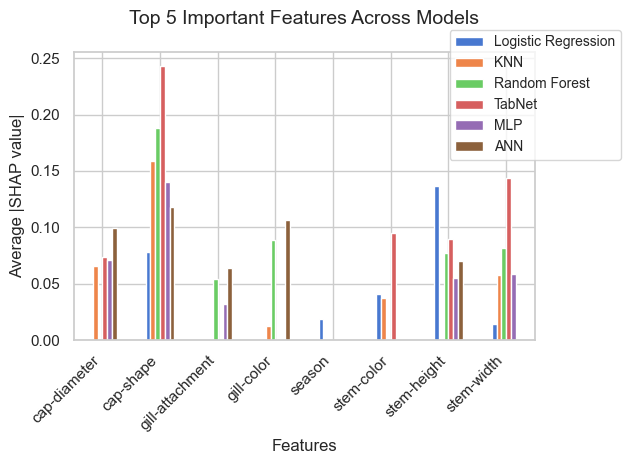

In [174]:
print("\n" + "="*50)
print("4. TOP 5 IMPORTANT FEATURES COMPARISON ACROSS MODELS")
print("="*50 + "\n")

# 4. Top Features Comparison
top_features = {}
for name, shap_values in model_shaps:
    feature_importance = np.abs(shap_values).mean(0)
    top_idx = np.argsort(feature_importance)[-5:]
    top_features[name] = pd.Series(
        feature_importance[top_idx], 
        index=X_test.columns[top_idx]
    )

plt.figure(figsize=(50, 25))
pd.DataFrame(top_features).plot(kind='bar')
plt.title('Top 5 Important Features Across Models', fontsize=14, pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Average |SHAP value|', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(0.8, 1.1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [134]:
print("\n" + "="*50)
print("5. NUMERICAL FEATURE IMPORTANCE VALUES")
print("="*50 + "\n")

# 5. Numerical Printout
print("Top 5 Important Features by Model:")
for model, features in top_features.items():
    print(f"\n{model}:")
    print("-" * len(model))
    for feat, importance in features.items():
        print(f"{feat:<30}: {importance:.4f}")


5. NUMERICAL FEATURE IMPORTANCE VALUES

Top 5 Important Features by Model:

Logistic Regression:
-------------------
stem-width                    : 0.0143
season                        : 0.0186
stem-color                    : 0.0410
cap-shape                     : 0.0780
stem-height                   : 0.1368

KNN:
---
gill-color                    : 0.0127
stem-color                    : 0.0373
stem-width                    : 0.0580
cap-diameter                  : 0.0660
cap-shape                     : 0.1587

Random Forest:
-------------
gill-attachment               : 0.0540
stem-height                   : 0.0773
stem-width                    : 0.0814
gill-color                    : 0.0892
cap-shape                     : 0.1882

TabNet:
------
cap-diameter                  : 0.0735
stem-height                   : 0.0898
stem-color                    : 0.0950
stem-width                    : 0.1437
cap-shape                     : 0.2435

MLP:
---
gill-attachment               : 0.03

  0%|          | 0/10079 [00:00<?, ?it/s]

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid featu

SHAP Values Shape: (10079, 8, 2)
X_test Shape: (10079, 8)


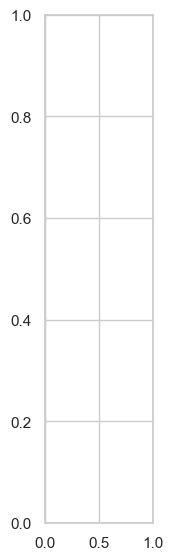

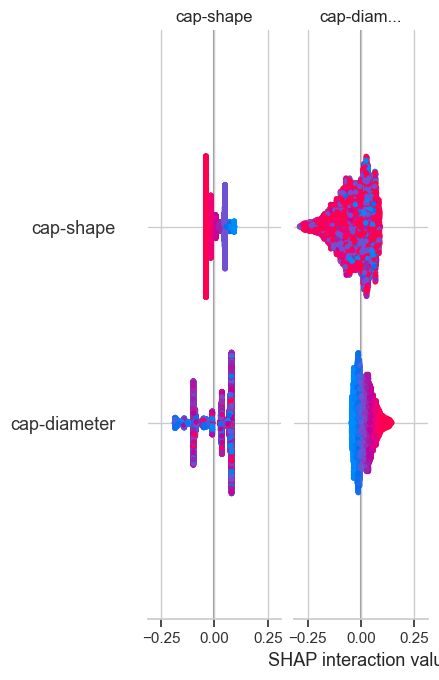

In [176]:
# Loop through each model and plot SHAP summary plots
for name, shap_values in models:
    print(f"\n{name} SHAP Values Shape: {shap_values.shape}")
    print(f"X_test Shape: {X_test.shape}")

    # Ensure that the SHAP values are in the correct format
    if shap_values.shape[0] == X_test.shape[0]:
        shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, title=f"{name} - Feature Importance")
    else:
        print(f"Shape mismatch for {name}: SHAP values and feature data do not have the same number of rows.")

In [177]:
# Loop through each model and plot SHAP summary plots
for name, shap_values in models:
    print(f"\n{name} SHAP Values Shape: {shap_values.shape}")
    print(f"X_test Shape: {X_test.shape}")

    # Ensure that the SHAP values are in the correct format
    if shap_values.shape[0] == X_test.shape[0]:
        shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, title=f"{name} - Feature Importance")
    else:
        print(f"Shape mismatch for {name}: SHAP values and feature data do not have the same number of rows.")

ValueError: too many values to unpack (expected 2)

///////////////////////////////////////////////////////////////////////


In [ ]:
import shap
shap.initjs()


#Get the SHAP values
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test)

In [ ]:
np.shape(shap_values.values)

In [ ]:
#waterfall plot
shap.plots.waterfall(shap_values[0])

shap.plots.waterfall(shap_values[1], max_display=10)

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
#shap dor binary target variable
y_pred=

In [27]:

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
